In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network,dcgan_model

# Load data

In [2]:
# Preprocessing
scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
latent_space =6
BATCH_SIZE = 100 #50
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 30000  #20000

X_train= x,y (1000, 2)
y_train= z (1000, 1)


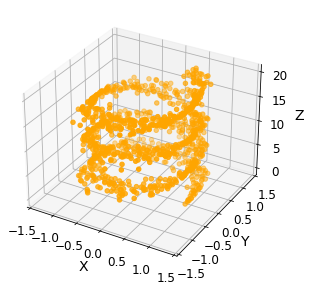

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# DC-GAN

### Architecture

In [5]:
generator=network.build_generator(latent_space, n_features)
print('##########generator##########:')
generator.summary()
discriminator=network.build_discriminator(n_features, latent_space, BATCH_SIZE)
print('##########discriminator##########:')
discriminator.summary()
dcgan = dcgan_model.DC_GAN(n_features,latent_space,BATCH_SIZE)

##########generator##########:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                216       
_________________________________________________________________
batch_normalization (BatchNo (None, 36)                144       
_________________________________________________________________
re_lu (ReLU)                 (None, 36)                0         
_________________________________________________________________
reshape (Reshape)            (None, 6, 6)              0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 6, 12)             72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 12)             48        
_________________________________________________________________
re_lu_1 (ReLU)           

### Preprocessing

In [6]:
train_dataset, scaler, X_train_scaled = dcgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

for data in train_dataset:
    print('train_dataset',data.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)


In [7]:
hist = dcgan.train(train_dataset, epochs, scaler, scaled, X_train=None, y_train=None)

Epoch 1/30000
Epoch 2/30000
Epoch 3/30000
Epoch 4/30000
Epoch 5/30000
Epoch 6/30000
Epoch 7/30000
Epoch 8/30000
Epoch 9/30000
Epoch 10/30000
Epoch 11/30000
Epoch 12/30000
Epoch 13/30000
Epoch 14/30000
Epoch 15/30000
Epoch 16/30000
Epoch 17/30000
Epoch 18/30000
Epoch 19/30000
Epoch 20/30000
Epoch 21/30000
Epoch 22/30000
Epoch 23/30000
Epoch 24/30000
Epoch 25/30000
Epoch 26/30000
Epoch 27/30000
Epoch 28/30000
Epoch 29/30000
Epoch 30/30000
Epoch 31/30000
Epoch 32/30000
Epoch 33/30000
Epoch 34/30000
Epoch 35/30000
Epoch 36/30000
Epoch 37/30000
Epoch 38/30000
Epoch 39/30000
Epoch 40/30000
Epoch 41/30000
Epoch 42/30000
Epoch 43/30000
Epoch 44/30000
Epoch 45/30000
Epoch 46/30000
Epoch 47/30000
Epoch 48/30000
Epoch 49/30000
Epoch 50/30000
Epoch 51/30000
Epoch 52/30000
Epoch 53/30000
Epoch 54/30000
Epoch 55/30000
Epoch 56/30000
Epoch 57/30000
Epoch 58/30000
Epoch 59/30000
Epoch 60/30000
Epoch 61/30000
Epoch 62/30000
Epoch 63/30000
Epoch 64/30000
Epoch 65/30000
Epoch 66/30000
Epoch 67/30000
Epoc

Epoch 523/30000
Epoch 524/30000
Epoch 525/30000
Epoch 526/30000
Epoch 527/30000
Epoch 528/30000
Epoch 529/30000
Epoch 530/30000
Epoch 531/30000
Epoch 532/30000
Epoch 533/30000
Epoch 534/30000
Epoch 535/30000
Epoch 536/30000
Epoch 537/30000
Epoch 538/30000
Epoch 539/30000
Epoch 540/30000
Epoch 541/30000
Epoch 542/30000
Epoch 543/30000
Epoch 544/30000
Epoch 545/30000
Epoch 546/30000
Epoch 547/30000
Epoch 548/30000
Epoch 549/30000
Epoch 550/30000
Epoch 551/30000
Epoch 552/30000
Epoch 553/30000
Epoch 554/30000
Epoch 555/30000
Epoch 556/30000
Epoch 557/30000
Epoch 558/30000
Epoch 559/30000
Epoch 560/30000
Epoch 561/30000
Epoch 562/30000
Epoch 563/30000
Epoch 564/30000
Epoch 565/30000
Epoch 566/30000
Epoch 567/30000
Epoch 568/30000
Epoch 569/30000
Epoch 570/30000
Epoch 571/30000
Epoch 572/30000
Epoch 573/30000
Epoch 574/30000
Epoch 575/30000
Epoch 576/30000
Epoch 577/30000
Epoch 578/30000
Epoch 579/30000
Epoch 580/30000
Epoch 581/30000
Epoch 582/30000
Epoch 583/30000
Epoch 584/30000
Epoch 58

Epoch 1038/30000
Epoch 1039/30000
Epoch 1040/30000
Epoch 1041/30000
Epoch 1042/30000
Epoch 1043/30000
Epoch 1044/30000
Epoch 1045/30000
Epoch 1046/30000
Epoch 1047/30000
Epoch 1048/30000
Epoch 1049/30000
Epoch 1050/30000
Epoch 1051/30000
Epoch 1052/30000
Epoch 1053/30000
Epoch 1054/30000
Epoch 1055/30000
Epoch 1056/30000
Epoch 1057/30000
Epoch 1058/30000
Epoch 1059/30000
Epoch 1060/30000
Epoch 1061/30000
Epoch 1062/30000
Epoch 1063/30000
Epoch 1064/30000
Epoch 1065/30000
Epoch 1066/30000
Epoch 1067/30000
Epoch 1068/30000
Epoch 1069/30000
Epoch 1070/30000
Epoch 1071/30000
Epoch 1072/30000
Epoch 1073/30000
Epoch 1074/30000
Epoch 1075/30000
Epoch 1076/30000
Epoch 1077/30000
Epoch 1078/30000
Epoch 1079/30000
Epoch 1080/30000
Epoch 1081/30000
Epoch 1082/30000
Epoch 1083/30000
Epoch 1084/30000
Epoch 1085/30000
Epoch 1086/30000
Epoch 1087/30000
Epoch 1088/30000
Epoch 1089/30000
Epoch 1090/30000
Epoch 1091/30000
Epoch 1092/30000
Epoch 1093/30000
Epoch 1094/30000
Epoch 1095/30000
Epoch 1096/300

Epoch 1522/30000
Epoch 1523/30000
Epoch 1524/30000
Epoch 1525/30000
Epoch 1526/30000
Epoch 1527/30000
Epoch 1528/30000
Epoch 1529/30000
Epoch 1530/30000
Epoch 1531/30000
Epoch 1532/30000
Epoch 1533/30000
Epoch 1534/30000
Epoch 1535/30000
Epoch 1536/30000
Epoch 1537/30000
Epoch 1538/30000
Epoch 1539/30000
Epoch 1540/30000
Epoch 1541/30000
Epoch 1542/30000
Epoch 1543/30000
Epoch 1544/30000
Epoch 1545/30000
Epoch 1546/30000
Epoch 1547/30000
Epoch 1548/30000
Epoch 1549/30000
Epoch 1550/30000
Epoch 1551/30000
Epoch 1552/30000
Epoch 1553/30000
Epoch 1554/30000
Epoch 1555/30000
Epoch 1556/30000
Epoch 1557/30000
Epoch 1558/30000
Epoch 1559/30000
Epoch 1560/30000
Epoch 1561/30000
Epoch 1562/30000
Epoch 1563/30000
Epoch 1564/30000
Epoch 1565/30000
Epoch 1566/30000
Epoch 1567/30000
Epoch 1568/30000
Epoch 1569/30000
Epoch 1570/30000
Epoch 1571/30000
Epoch 1572/30000
Epoch 1573/30000
Epoch 1574/30000
Epoch 1575/30000
Epoch 1576/30000
Epoch 1577/30000
Epoch 1578/30000
Epoch 1579/30000
Epoch 1580/300

Epoch 2008/30000
Epoch 2009/30000
Epoch 2010/30000
Epoch 2011/30000
Epoch 2012/30000
Epoch 2013/30000
Epoch 2014/30000
Epoch 2015/30000
Epoch 2016/30000
Epoch 2017/30000
Epoch 2018/30000
Epoch 2019/30000
Epoch 2020/30000
Epoch 2021/30000
Epoch 2022/30000
Epoch 2023/30000
Epoch 2024/30000
Epoch 2025/30000
Epoch 2026/30000
Epoch 2027/30000
Epoch 2028/30000
Epoch 2029/30000
Epoch 2030/30000
Epoch 2031/30000
Epoch 2032/30000
Epoch 2033/30000
Epoch 2034/30000
Epoch 2035/30000
Epoch 2036/30000
Epoch 2037/30000
Epoch 2038/30000
Epoch 2039/30000
Epoch 2040/30000
Epoch 2041/30000
Epoch 2042/30000
Epoch 2043/30000
Epoch 2044/30000
Epoch 2045/30000
Epoch 2046/30000
Epoch 2047/30000
Epoch 2048/30000
Epoch 2049/30000
Epoch 2050/30000
Epoch 2051/30000
Epoch 2052/30000
Epoch 2053/30000
Epoch 2054/30000
Epoch 2055/30000
Epoch 2056/30000
Epoch 2057/30000
Epoch 2058/30000
Epoch 2059/30000
Epoch 2060/30000
Epoch 2061/30000
Epoch 2062/30000
Epoch 2063/30000
Epoch 2064/30000
Epoch 2065/30000
Epoch 2066/300

Epoch 2495/30000
Epoch 2496/30000
Epoch 2497/30000
Epoch 2498/30000
Epoch 2499/30000
Epoch 2500/30000
Epoch 2501/30000
Epoch 2502/30000
Epoch 2503/30000
Epoch 2504/30000
Epoch 2505/30000
Epoch 2506/30000
Epoch 2507/30000
Epoch 2508/30000
Epoch 2509/30000
Epoch 2510/30000
Epoch 2511/30000
Epoch 2512/30000
Epoch 2513/30000
Epoch 2514/30000
Epoch 2515/30000
Epoch 2516/30000
Epoch 2517/30000
Epoch 2518/30000
Epoch 2519/30000
Epoch 2520/30000
Epoch 2521/30000
Epoch 2522/30000
Epoch 2523/30000
Epoch 2524/30000
Epoch 2525/30000
Epoch 2526/30000
Epoch 2527/30000
Epoch 2528/30000
Epoch 2529/30000
Epoch 2530/30000
Epoch 2531/30000
Epoch 2532/30000
Epoch 2533/30000
Epoch 2534/30000
Epoch 2535/30000
Epoch 2536/30000
Epoch 2537/30000
Epoch 2538/30000
Epoch 2539/30000
Epoch 2540/30000
Epoch 2541/30000
Epoch 2542/30000
Epoch 2543/30000
Epoch 2544/30000
Epoch 2545/30000
Epoch 2546/30000
Epoch 2547/30000
Epoch 2548/30000
Epoch 2549/30000
Epoch 2550/30000
Epoch 2551/30000
Epoch 2552/30000
Epoch 2553/300

Epoch 2980/30000
Epoch 2981/30000
Epoch 2982/30000
Epoch 2983/30000
Epoch 2984/30000
Epoch 2985/30000
Epoch 2986/30000
Epoch 2987/30000
Epoch 2988/30000
Epoch 2989/30000
Epoch 2990/30000
Epoch 2991/30000
Epoch 2992/30000
Epoch 2993/30000
Epoch 2994/30000
Epoch 2995/30000
Epoch 2996/30000
Epoch 2997/30000
Epoch 2998/30000
Epoch 2999/30000
Epoch 3000/30000
Epoch 3001/30000
Epoch 3002/30000
Epoch 3003/30000
Epoch 3004/30000
Epoch 3005/30000
Epoch 3006/30000
Epoch 3007/30000
Epoch 3008/30000
Epoch 3009/30000
Epoch 3010/30000
Epoch 3011/30000
Epoch 3012/30000
Epoch 3013/30000
Epoch 3014/30000
Epoch 3015/30000
Epoch 3016/30000
Epoch 3017/30000
Epoch 3018/30000
Epoch 3019/30000
Epoch 3020/30000
Epoch 3021/30000
Epoch 3022/30000
Epoch 3023/30000
Epoch 3024/30000
Epoch 3025/30000
Epoch 3026/30000
Epoch 3027/30000
Epoch 3028/30000
Epoch 3029/30000
Epoch 3030/30000
Epoch 3031/30000
Epoch 3032/30000
Epoch 3033/30000
Epoch 3034/30000
Epoch 3035/30000
Epoch 3036/30000
Epoch 3037/30000
Epoch 3038/300

Epoch 3467/30000
Epoch 3468/30000
Epoch 3469/30000
Epoch 3470/30000
Epoch 3471/30000
Epoch 3472/30000
Epoch 3473/30000
Epoch 3474/30000
Epoch 3475/30000
Epoch 3476/30000
Epoch 3477/30000
Epoch 3478/30000
Epoch 3479/30000
Epoch 3480/30000
Epoch 3481/30000
Epoch 3482/30000
Epoch 3483/30000
Epoch 3484/30000
Epoch 3485/30000
Epoch 3486/30000
Epoch 3487/30000
Epoch 3488/30000
Epoch 3489/30000
Epoch 3490/30000
Epoch 3491/30000
Epoch 3492/30000
Epoch 3493/30000
Epoch 3494/30000
Epoch 3495/30000
Epoch 3496/30000
Epoch 3497/30000
Epoch 3498/30000
Epoch 3499/30000
Epoch 3500/30000
Epoch 3501/30000
Epoch 3502/30000
Epoch 3503/30000
Epoch 3504/30000
Epoch 3505/30000
Epoch 3506/30000
Epoch 3507/30000
Epoch 3508/30000
Epoch 3509/30000
Epoch 3510/30000
Epoch 3511/30000
Epoch 3512/30000
Epoch 3513/30000
Epoch 3514/30000
Epoch 3515/30000
Epoch 3516/30000
Epoch 3517/30000
Epoch 3518/30000
Epoch 3519/30000
Epoch 3520/30000
Epoch 3521/30000
Epoch 3522/30000
Epoch 3523/30000
Epoch 3524/30000
Epoch 3525/300

Epoch 3951/30000
Epoch 3952/30000
Epoch 3953/30000
Epoch 3954/30000
Epoch 3955/30000
Epoch 3956/30000
Epoch 3957/30000
Epoch 3958/30000
Epoch 3959/30000
Epoch 3960/30000
Epoch 3961/30000
Epoch 3962/30000
Epoch 3963/30000
Epoch 3964/30000
Epoch 3965/30000
Epoch 3966/30000
Epoch 3967/30000
Epoch 3968/30000
Epoch 3969/30000
Epoch 3970/30000
Epoch 3971/30000
Epoch 3972/30000
Epoch 3973/30000
Epoch 3974/30000
Epoch 3975/30000
Epoch 3976/30000
Epoch 3977/30000
Epoch 3978/30000
Epoch 3979/30000
Epoch 3980/30000
Epoch 3981/30000
Epoch 3982/30000
Epoch 3983/30000
Epoch 3984/30000
Epoch 3985/30000
Epoch 3986/30000
Epoch 3987/30000
Epoch 3988/30000
Epoch 3989/30000
Epoch 3990/30000
Epoch 3991/30000
Epoch 3992/30000
Epoch 3993/30000
Epoch 3994/30000
Epoch 3995/30000
Epoch 3996/30000
Epoch 3997/30000
Epoch 3998/30000
Epoch 3999/30000
Epoch 4000/30000
Epoch 4001/30000
Epoch 4002/30000
Epoch 4003/30000
Epoch 4004/30000
Epoch 4005/30000
Epoch 4006/30000
Epoch 4007/30000
Epoch 4008/30000
Epoch 4009/300

Epoch 4433/30000
Epoch 4434/30000
Epoch 4435/30000
Epoch 4436/30000
Epoch 4437/30000
Epoch 4438/30000
Epoch 4439/30000
Epoch 4440/30000
Epoch 4441/30000
Epoch 4442/30000
Epoch 4443/30000
Epoch 4444/30000
Epoch 4445/30000
Epoch 4446/30000
Epoch 4447/30000
Epoch 4448/30000
Epoch 4449/30000
Epoch 4450/30000
Epoch 4451/30000
Epoch 4452/30000
Epoch 4453/30000
Epoch 4454/30000
Epoch 4455/30000
Epoch 4456/30000
Epoch 4457/30000
Epoch 4458/30000
Epoch 4459/30000
Epoch 4460/30000
Epoch 4461/30000
Epoch 4462/30000
Epoch 4463/30000
Epoch 4464/30000
Epoch 4465/30000
Epoch 4466/30000
Epoch 4467/30000
Epoch 4468/30000
Epoch 4469/30000
Epoch 4470/30000
Epoch 4471/30000
Epoch 4472/30000
Epoch 4473/30000
Epoch 4474/30000
Epoch 4475/30000
Epoch 4476/30000
Epoch 4477/30000
Epoch 4478/30000
Epoch 4479/30000
Epoch 4480/30000
Epoch 4481/30000
Epoch 4482/30000
Epoch 4483/30000
Epoch 4484/30000
Epoch 4485/30000
Epoch 4486/30000
Epoch 4487/30000
Epoch 4488/30000
Epoch 4489/30000
Epoch 4490/30000
Epoch 4491/300

Epoch 4915/30000
Epoch 4916/30000
Epoch 4917/30000
Epoch 4918/30000
Epoch 4919/30000
Epoch 4920/30000
Epoch 4921/30000
Epoch 4922/30000
Epoch 4923/30000
Epoch 4924/30000
Epoch 4925/30000
Epoch 4926/30000
Epoch 4927/30000
Epoch 4928/30000
Epoch 4929/30000
Epoch 4930/30000
Epoch 4931/30000
Epoch 4932/30000
Epoch 4933/30000
Epoch 4934/30000
Epoch 4935/30000
Epoch 4936/30000
Epoch 4937/30000
Epoch 4938/30000
Epoch 4939/30000
Epoch 4940/30000
Epoch 4941/30000
Epoch 4942/30000
Epoch 4943/30000
Epoch 4944/30000
Epoch 4945/30000
Epoch 4946/30000
Epoch 4947/30000
Epoch 4948/30000
Epoch 4949/30000
Epoch 4950/30000
Epoch 4951/30000
Epoch 4952/30000
Epoch 4953/30000
Epoch 4954/30000
Epoch 4955/30000
Epoch 4956/30000
Epoch 4957/30000
Epoch 4958/30000
Epoch 4959/30000
Epoch 4960/30000
Epoch 4961/30000
Epoch 4962/30000
Epoch 4963/30000
Epoch 4964/30000
Epoch 4965/30000
Epoch 4966/30000
Epoch 4967/30000
Epoch 4968/30000
Epoch 4969/30000
Epoch 4970/30000
Epoch 4971/30000
Epoch 4972/30000
Epoch 4973/300

Epoch 5401/30000
Epoch 5402/30000
Epoch 5403/30000
Epoch 5404/30000
Epoch 5405/30000
Epoch 5406/30000
Epoch 5407/30000
Epoch 5408/30000
Epoch 5409/30000
Epoch 5410/30000
Epoch 5411/30000
Epoch 5412/30000
Epoch 5413/30000
Epoch 5414/30000
Epoch 5415/30000
Epoch 5416/30000
Epoch 5417/30000
Epoch 5418/30000
Epoch 5419/30000
Epoch 5420/30000
Epoch 5421/30000
Epoch 5422/30000
Epoch 5423/30000
Epoch 5424/30000
Epoch 5425/30000
Epoch 5426/30000
Epoch 5427/30000
Epoch 5428/30000
Epoch 5429/30000
Epoch 5430/30000
Epoch 5431/30000
Epoch 5432/30000
Epoch 5433/30000
Epoch 5434/30000
Epoch 5435/30000
Epoch 5436/30000
Epoch 5437/30000
Epoch 5438/30000
Epoch 5439/30000
Epoch 5440/30000
Epoch 5441/30000
Epoch 5442/30000
Epoch 5443/30000
Epoch 5444/30000
Epoch 5445/30000
Epoch 5446/30000
Epoch 5447/30000
Epoch 5448/30000
Epoch 5449/30000
Epoch 5450/30000
Epoch 5451/30000
Epoch 5452/30000
Epoch 5453/30000
Epoch 5454/30000
Epoch 5455/30000
Epoch 5456/30000
Epoch 5457/30000
Epoch 5458/30000
Epoch 5459/300

Epoch 5883/30000
Epoch 5884/30000
Epoch 5885/30000
Epoch 5886/30000
Epoch 5887/30000
Epoch 5888/30000
Epoch 5889/30000
Epoch 5890/30000
Epoch 5891/30000
Epoch 5892/30000
Epoch 5893/30000
Epoch 5894/30000
Epoch 5895/30000
Epoch 5896/30000
Epoch 5897/30000
Epoch 5898/30000
Epoch 5899/30000
Epoch 5900/30000
Epoch 5901/30000
Epoch 5902/30000
Epoch 5903/30000
Epoch 5904/30000
Epoch 5905/30000
Epoch 5906/30000
Epoch 5907/30000
Epoch 5908/30000
Epoch 5909/30000
Epoch 5910/30000
Epoch 5911/30000
Epoch 5912/30000
Epoch 5913/30000
Epoch 5914/30000
Epoch 5915/30000
Epoch 5916/30000
Epoch 5917/30000
Epoch 5918/30000
Epoch 5919/30000
Epoch 5920/30000
Epoch 5921/30000
Epoch 5922/30000
Epoch 5923/30000
Epoch 5924/30000
Epoch 5925/30000
Epoch 5926/30000
Epoch 5927/30000
Epoch 5928/30000
Epoch 5929/30000
Epoch 5930/30000
Epoch 5931/30000
Epoch 5932/30000
Epoch 5933/30000
Epoch 5934/30000
Epoch 5935/30000
Epoch 5936/30000
Epoch 5937/30000
Epoch 5938/30000
Epoch 5939/30000
Epoch 5940/30000
Epoch 5941/300

Epoch 6367/30000
Epoch 6368/30000
Epoch 6369/30000
Epoch 6370/30000
Epoch 6371/30000
Epoch 6372/30000
Epoch 6373/30000
Epoch 6374/30000
Epoch 6375/30000
Epoch 6376/30000
Epoch 6377/30000
Epoch 6378/30000
Epoch 6379/30000
Epoch 6380/30000
Epoch 6381/30000
Epoch 6382/30000
Epoch 6383/30000
Epoch 6384/30000
Epoch 6385/30000
Epoch 6386/30000
Epoch 6387/30000
Epoch 6388/30000
Epoch 6389/30000
Epoch 6390/30000
Epoch 6391/30000
Epoch 6392/30000
Epoch 6393/30000
Epoch 6394/30000
Epoch 6395/30000
Epoch 6396/30000
Epoch 6397/30000
Epoch 6398/30000
Epoch 6399/30000
Epoch 6400/30000
Epoch 6401/30000
Epoch 6402/30000
Epoch 6403/30000
Epoch 6404/30000
Epoch 6405/30000
Epoch 6406/30000
Epoch 6407/30000
Epoch 6408/30000
Epoch 6409/30000
Epoch 6410/30000
Epoch 6411/30000
Epoch 6412/30000
Epoch 6413/30000
Epoch 6414/30000
Epoch 6415/30000
Epoch 6416/30000
Epoch 6417/30000
Epoch 6418/30000
Epoch 6419/30000
Epoch 6420/30000
Epoch 6421/30000
Epoch 6422/30000
Epoch 6423/30000
Epoch 6424/30000
Epoch 6425/300

Epoch 6853/30000
Epoch 6854/30000
Epoch 6855/30000
Epoch 6856/30000
Epoch 6857/30000
Epoch 6858/30000
Epoch 6859/30000
Epoch 6860/30000
Epoch 6861/30000
Epoch 6862/30000
Epoch 6863/30000
Epoch 6864/30000
Epoch 6865/30000
Epoch 6866/30000
Epoch 6867/30000
Epoch 6868/30000
Epoch 6869/30000
Epoch 6870/30000
Epoch 6871/30000
Epoch 6872/30000
Epoch 6873/30000
Epoch 6874/30000
Epoch 6875/30000
Epoch 6876/30000
Epoch 6877/30000
Epoch 6878/30000
Epoch 6879/30000
Epoch 6880/30000
Epoch 6881/30000
Epoch 6882/30000
Epoch 6883/30000
Epoch 6884/30000
Epoch 6885/30000
Epoch 6886/30000
Epoch 6887/30000
Epoch 6888/30000
Epoch 6889/30000
Epoch 6890/30000
Epoch 6891/30000
Epoch 6892/30000
Epoch 6893/30000
Epoch 6894/30000
Epoch 6895/30000
Epoch 6896/30000
Epoch 6897/30000
Epoch 6898/30000
Epoch 6899/30000
Epoch 6900/30000
Epoch 6901/30000
Epoch 6902/30000
Epoch 6903/30000
Epoch 6904/30000
Epoch 6905/30000
Epoch 6906/30000
Epoch 6907/30000
Epoch 6908/30000
Epoch 6909/30000
Epoch 6910/30000
Epoch 6911/300

Epoch 7336/30000
Epoch 7337/30000
Epoch 7338/30000
Epoch 7339/30000
Epoch 7340/30000
Epoch 7341/30000
Epoch 7342/30000
Epoch 7343/30000
Epoch 7344/30000
Epoch 7345/30000
Epoch 7346/30000
Epoch 7347/30000
Epoch 7348/30000
Epoch 7349/30000
Epoch 7350/30000
Epoch 7351/30000
Epoch 7352/30000
Epoch 7353/30000
Epoch 7354/30000
Epoch 7355/30000
Epoch 7356/30000
Epoch 7357/30000
Epoch 7358/30000
Epoch 7359/30000
Epoch 7360/30000
Epoch 7361/30000
Epoch 7362/30000
Epoch 7363/30000
Epoch 7364/30000
Epoch 7365/30000
Epoch 7366/30000
Epoch 7367/30000
Epoch 7368/30000
Epoch 7369/30000
Epoch 7370/30000
Epoch 7371/30000
Epoch 7372/30000
Epoch 7373/30000
Epoch 7374/30000
Epoch 7375/30000
Epoch 7376/30000
Epoch 7377/30000
Epoch 7378/30000
Epoch 7379/30000
Epoch 7380/30000
Epoch 7381/30000
Epoch 7382/30000
Epoch 7383/30000
Epoch 7384/30000
Epoch 7385/30000
Epoch 7386/30000
Epoch 7387/30000
Epoch 7388/30000
Epoch 7389/30000
Epoch 7390/30000
Epoch 7391/30000
Epoch 7392/30000
Epoch 7393/30000
Epoch 7394/300

Epoch 7821/30000
Epoch 7822/30000
Epoch 7823/30000
Epoch 7824/30000
Epoch 7825/30000
Epoch 7826/30000
Epoch 7827/30000
Epoch 7828/30000
Epoch 7829/30000
Epoch 7830/30000
Epoch 7831/30000
Epoch 7832/30000
Epoch 7833/30000
Epoch 7834/30000
Epoch 7835/30000
Epoch 7836/30000
Epoch 7837/30000
Epoch 7838/30000
Epoch 7839/30000
Epoch 7840/30000
Epoch 7841/30000
Epoch 7842/30000
Epoch 7843/30000
Epoch 7844/30000
Epoch 7845/30000
Epoch 7846/30000
Epoch 7847/30000
Epoch 7848/30000
Epoch 7849/30000
Epoch 7850/30000
Epoch 7851/30000
Epoch 7852/30000
Epoch 7853/30000
Epoch 7854/30000
Epoch 7855/30000
Epoch 7856/30000
Epoch 7857/30000
Epoch 7858/30000
Epoch 7859/30000
Epoch 7860/30000
Epoch 7861/30000
Epoch 7862/30000
Epoch 7863/30000
Epoch 7864/30000
Epoch 7865/30000
Epoch 7866/30000
Epoch 7867/30000
Epoch 7868/30000
Epoch 7869/30000
Epoch 7870/30000
Epoch 7871/30000
Epoch 7872/30000
Epoch 7873/30000
Epoch 7874/30000
Epoch 7875/30000
Epoch 7876/30000
Epoch 7877/30000
Epoch 7878/30000
Epoch 7879/300

Epoch 8308/30000
Epoch 8309/30000
Epoch 8310/30000
Epoch 8311/30000
Epoch 8312/30000
Epoch 8313/30000
Epoch 8314/30000
Epoch 8315/30000
Epoch 8316/30000
Epoch 8317/30000
Epoch 8318/30000
Epoch 8319/30000
Epoch 8320/30000
Epoch 8321/30000
Epoch 8322/30000
Epoch 8323/30000
Epoch 8324/30000
Epoch 8325/30000
Epoch 8326/30000
Epoch 8327/30000
Epoch 8328/30000
Epoch 8329/30000
Epoch 8330/30000
Epoch 8331/30000
Epoch 8332/30000
Epoch 8333/30000
Epoch 8334/30000
Epoch 8335/30000
Epoch 8336/30000
Epoch 8337/30000
Epoch 8338/30000
Epoch 8339/30000
Epoch 8340/30000
Epoch 8341/30000
Epoch 8342/30000
Epoch 8343/30000
Epoch 8344/30000
Epoch 8345/30000
Epoch 8346/30000
Epoch 8347/30000
Epoch 8348/30000
Epoch 8349/30000
Epoch 8350/30000
Epoch 8351/30000
Epoch 8352/30000
Epoch 8353/30000
Epoch 8354/30000
Epoch 8355/30000
Epoch 8356/30000
Epoch 8357/30000
Epoch 8358/30000
Epoch 8359/30000
Epoch 8360/30000
Epoch 8361/30000
Epoch 8362/30000
Epoch 8363/30000
Epoch 8364/30000
Epoch 8365/30000
Epoch 8366/300

Epoch 8791/30000
Epoch 8792/30000
Epoch 8793/30000
Epoch 8794/30000
Epoch 8795/30000
Epoch 8796/30000
Epoch 8797/30000
Epoch 8798/30000
Epoch 8799/30000
Epoch 8800/30000
Epoch 8801/30000
Epoch 8802/30000
Epoch 8803/30000
Epoch 8804/30000
Epoch 8805/30000
Epoch 8806/30000
Epoch 8807/30000
Epoch 8808/30000
Epoch 8809/30000
Epoch 8810/30000
Epoch 8811/30000
Epoch 8812/30000
Epoch 8813/30000
Epoch 8814/30000
Epoch 8815/30000
Epoch 8816/30000
Epoch 8817/30000
Epoch 8818/30000
Epoch 8819/30000
Epoch 8820/30000
Epoch 8821/30000
Epoch 8822/30000
Epoch 8823/30000
Epoch 8824/30000
Epoch 8825/30000
Epoch 8826/30000
Epoch 8827/30000
Epoch 8828/30000
Epoch 8829/30000
Epoch 8830/30000
Epoch 8831/30000
Epoch 8832/30000
Epoch 8833/30000
Epoch 8834/30000
Epoch 8835/30000
Epoch 8836/30000
Epoch 8837/30000
Epoch 8838/30000
Epoch 8839/30000
Epoch 8840/30000
Epoch 8841/30000
Epoch 8842/30000
Epoch 8843/30000
Epoch 8844/30000
Epoch 8845/30000
Epoch 8846/30000
Epoch 8847/30000
Epoch 8848/30000
Epoch 8849/300

Epoch 9274/30000
Epoch 9275/30000
Epoch 9276/30000
Epoch 9277/30000
Epoch 9278/30000
Epoch 9279/30000
Epoch 9280/30000
Epoch 9281/30000
Epoch 9282/30000
Epoch 9283/30000
Epoch 9284/30000
Epoch 9285/30000
Epoch 9286/30000
Epoch 9287/30000
Epoch 9288/30000
Epoch 9289/30000
Epoch 9290/30000
Epoch 9291/30000
Epoch 9292/30000
Epoch 9293/30000
Epoch 9294/30000
Epoch 9295/30000
Epoch 9296/30000
Epoch 9297/30000
Epoch 9298/30000
Epoch 9299/30000
Epoch 9300/30000
Epoch 9301/30000
Epoch 9302/30000
Epoch 9303/30000
Epoch 9304/30000
Epoch 9305/30000
Epoch 9306/30000
Epoch 9307/30000
Epoch 9308/30000
Epoch 9309/30000
Epoch 9310/30000
Epoch 9311/30000
Epoch 9312/30000
Epoch 9313/30000
Epoch 9314/30000
Epoch 9315/30000
Epoch 9316/30000
Epoch 9317/30000
Epoch 9318/30000
Epoch 9319/30000
Epoch 9320/30000
Epoch 9321/30000
Epoch 9322/30000
Epoch 9323/30000
Epoch 9324/30000
Epoch 9325/30000
Epoch 9326/30000
Epoch 9327/30000
Epoch 9328/30000
Epoch 9329/30000
Epoch 9330/30000
Epoch 9331/30000
Epoch 9332/300

Epoch 9756/30000
Epoch 9757/30000
Epoch 9758/30000
Epoch 9759/30000
Epoch 9760/30000
Epoch 9761/30000
Epoch 9762/30000
Epoch 9763/30000
Epoch 9764/30000
Epoch 9765/30000
Epoch 9766/30000
Epoch 9767/30000
Epoch 9768/30000
Epoch 9769/30000
Epoch 9770/30000
Epoch 9771/30000
Epoch 9772/30000
Epoch 9773/30000
Epoch 9774/30000
Epoch 9775/30000
Epoch 9776/30000
Epoch 9777/30000
Epoch 9778/30000
Epoch 9779/30000
Epoch 9780/30000
Epoch 9781/30000
Epoch 9782/30000
Epoch 9783/30000
Epoch 9784/30000
Epoch 9785/30000
Epoch 9786/30000
Epoch 9787/30000
Epoch 9788/30000
Epoch 9789/30000
Epoch 9790/30000
Epoch 9791/30000
Epoch 9792/30000
Epoch 9793/30000
Epoch 9794/30000
Epoch 9795/30000
Epoch 9796/30000
Epoch 9797/30000
Epoch 9798/30000
Epoch 9799/30000
Epoch 9800/30000
Epoch 9801/30000
Epoch 9802/30000
Epoch 9803/30000
Epoch 9804/30000
Epoch 9805/30000
Epoch 9806/30000
Epoch 9807/30000
Epoch 9808/30000
Epoch 9809/30000
Epoch 9810/30000
Epoch 9811/30000
Epoch 9812/30000
Epoch 9813/30000
Epoch 9814/300

Epoch 10226/30000
Epoch 10227/30000
Epoch 10228/30000
Epoch 10229/30000
Epoch 10230/30000
Epoch 10231/30000
Epoch 10232/30000
Epoch 10233/30000
Epoch 10234/30000
Epoch 10235/30000
Epoch 10236/30000
Epoch 10237/30000
Epoch 10238/30000
Epoch 10239/30000
Epoch 10240/30000
Epoch 10241/30000
Epoch 10242/30000
Epoch 10243/30000
Epoch 10244/30000
Epoch 10245/30000
Epoch 10246/30000
Epoch 10247/30000
Epoch 10248/30000
Epoch 10249/30000
Epoch 10250/30000
Epoch 10251/30000
Epoch 10252/30000
Epoch 10253/30000
Epoch 10254/30000
Epoch 10255/30000
Epoch 10256/30000
Epoch 10257/30000
Epoch 10258/30000
Epoch 10259/30000
Epoch 10260/30000
Epoch 10261/30000
Epoch 10262/30000
Epoch 10263/30000
Epoch 10264/30000
Epoch 10265/30000
Epoch 10266/30000
Epoch 10267/30000
Epoch 10268/30000
Epoch 10269/30000
Epoch 10270/30000
Epoch 10271/30000
Epoch 10272/30000
Epoch 10273/30000
Epoch 10274/30000
Epoch 10275/30000
Epoch 10276/30000
Epoch 10277/30000
Epoch 10278/30000
Epoch 10279/30000
Epoch 10280/30000
Epoch 1028

Epoch 10683/30000
Epoch 10684/30000
Epoch 10685/30000
Epoch 10686/30000
Epoch 10687/30000
Epoch 10688/30000
Epoch 10689/30000
Epoch 10690/30000
Epoch 10691/30000
Epoch 10692/30000
Epoch 10693/30000
Epoch 10694/30000
Epoch 10695/30000
Epoch 10696/30000
Epoch 10697/30000
Epoch 10698/30000
Epoch 10699/30000
Epoch 10700/30000
Epoch 10701/30000
Epoch 10702/30000
Epoch 10703/30000
Epoch 10704/30000
Epoch 10705/30000
Epoch 10706/30000
Epoch 10707/30000
Epoch 10708/30000
Epoch 10709/30000
Epoch 10710/30000
Epoch 10711/30000
Epoch 10712/30000
Epoch 10713/30000
Epoch 10714/30000
Epoch 10715/30000
Epoch 10716/30000
Epoch 10717/30000
Epoch 10718/30000
Epoch 10719/30000
Epoch 10720/30000
Epoch 10721/30000
Epoch 10722/30000
Epoch 10723/30000
Epoch 10724/30000
Epoch 10725/30000
Epoch 10726/30000
Epoch 10727/30000
Epoch 10728/30000
Epoch 10729/30000
Epoch 10730/30000
Epoch 10731/30000
Epoch 10732/30000
Epoch 10733/30000
Epoch 10734/30000
Epoch 10735/30000
Epoch 10736/30000
Epoch 10737/30000
Epoch 1073

Epoch 11141/30000
Epoch 11142/30000
Epoch 11143/30000
Epoch 11144/30000
Epoch 11145/30000
Epoch 11146/30000
Epoch 11147/30000
Epoch 11148/30000
Epoch 11149/30000
Epoch 11150/30000
Epoch 11151/30000
Epoch 11152/30000
Epoch 11153/30000
Epoch 11154/30000
Epoch 11155/30000
Epoch 11156/30000
Epoch 11157/30000
Epoch 11158/30000
Epoch 11159/30000
Epoch 11160/30000
Epoch 11161/30000
Epoch 11162/30000
Epoch 11163/30000
Epoch 11164/30000
Epoch 11165/30000
Epoch 11166/30000
Epoch 11167/30000
Epoch 11168/30000
Epoch 11169/30000
Epoch 11170/30000
Epoch 11171/30000
Epoch 11172/30000
Epoch 11173/30000
Epoch 11174/30000
Epoch 11175/30000
Epoch 11176/30000
Epoch 11177/30000
Epoch 11178/30000
Epoch 11179/30000
Epoch 11180/30000
Epoch 11181/30000
Epoch 11182/30000
Epoch 11183/30000
Epoch 11184/30000
Epoch 11185/30000
Epoch 11186/30000
Epoch 11187/30000
Epoch 11188/30000
Epoch 11189/30000
Epoch 11190/30000
Epoch 11191/30000
Epoch 11192/30000
Epoch 11193/30000
Epoch 11194/30000
Epoch 11195/30000
Epoch 1119

Epoch 11598/30000
Epoch 11599/30000
Epoch 11600/30000
Epoch 11601/30000
Epoch 11602/30000
Epoch 11603/30000
Epoch 11604/30000
Epoch 11605/30000
Epoch 11606/30000
Epoch 11607/30000
Epoch 11608/30000
Epoch 11609/30000
Epoch 11610/30000
Epoch 11611/30000
Epoch 11612/30000
Epoch 11613/30000
Epoch 11614/30000
Epoch 11615/30000
Epoch 11616/30000
Epoch 11617/30000
Epoch 11618/30000
Epoch 11619/30000
Epoch 11620/30000
Epoch 11621/30000
Epoch 11622/30000
Epoch 11623/30000
Epoch 11624/30000
Epoch 11625/30000
Epoch 11626/30000
Epoch 11627/30000
Epoch 11628/30000
Epoch 11629/30000
Epoch 11630/30000
Epoch 11631/30000
Epoch 11632/30000
Epoch 11633/30000
Epoch 11634/30000
Epoch 11635/30000
Epoch 11636/30000
Epoch 11637/30000
Epoch 11638/30000
Epoch 11639/30000
Epoch 11640/30000
Epoch 11641/30000
Epoch 11642/30000
Epoch 11643/30000
Epoch 11644/30000
Epoch 11645/30000
Epoch 11646/30000
Epoch 11647/30000
Epoch 11648/30000
Epoch 11649/30000
Epoch 11650/30000
Epoch 11651/30000
Epoch 11652/30000
Epoch 1165

Epoch 12056/30000
Epoch 12057/30000
Epoch 12058/30000
Epoch 12059/30000
Epoch 12060/30000
Epoch 12061/30000
Epoch 12062/30000
Epoch 12063/30000
Epoch 12064/30000
Epoch 12065/30000
Epoch 12066/30000
Epoch 12067/30000
Epoch 12068/30000
Epoch 12069/30000
Epoch 12070/30000
Epoch 12071/30000
Epoch 12072/30000
Epoch 12073/30000
Epoch 12074/30000
Epoch 12075/30000
Epoch 12076/30000
Epoch 12077/30000
Epoch 12078/30000
Epoch 12079/30000
Epoch 12080/30000
Epoch 12081/30000
Epoch 12082/30000
Epoch 12083/30000
Epoch 12084/30000
Epoch 12085/30000
Epoch 12086/30000
Epoch 12087/30000
Epoch 12088/30000
Epoch 12089/30000
Epoch 12090/30000
Epoch 12091/30000
Epoch 12092/30000
Epoch 12093/30000
Epoch 12094/30000
Epoch 12095/30000
Epoch 12096/30000
Epoch 12097/30000
Epoch 12098/30000
Epoch 12099/30000
Epoch 12100/30000
Epoch 12101/30000
Epoch 12102/30000
Epoch 12103/30000
Epoch 12104/30000
Epoch 12105/30000
Epoch 12106/30000
Epoch 12107/30000
Epoch 12108/30000
Epoch 12109/30000
Epoch 12110/30000
Epoch 1211

Epoch 12512/30000
Epoch 12513/30000
Epoch 12514/30000
Epoch 12515/30000
Epoch 12516/30000
Epoch 12517/30000
Epoch 12518/30000
Epoch 12519/30000
Epoch 12520/30000
Epoch 12521/30000
Epoch 12522/30000
Epoch 12523/30000
Epoch 12524/30000
Epoch 12525/30000
Epoch 12526/30000
Epoch 12527/30000
Epoch 12528/30000
Epoch 12529/30000
Epoch 12530/30000
Epoch 12531/30000
Epoch 12532/30000
Epoch 12533/30000
Epoch 12534/30000
Epoch 12535/30000
Epoch 12536/30000
Epoch 12537/30000
Epoch 12538/30000
Epoch 12539/30000
Epoch 12540/30000
Epoch 12541/30000
Epoch 12542/30000
Epoch 12543/30000
Epoch 12544/30000
Epoch 12545/30000
Epoch 12546/30000
Epoch 12547/30000
Epoch 12548/30000
Epoch 12549/30000
Epoch 12550/30000
Epoch 12551/30000
Epoch 12552/30000
Epoch 12553/30000
Epoch 12554/30000
Epoch 12555/30000
Epoch 12556/30000
Epoch 12557/30000
Epoch 12558/30000
Epoch 12559/30000
Epoch 12560/30000
Epoch 12561/30000
Epoch 12562/30000
Epoch 12563/30000
Epoch 12564/30000
Epoch 12565/30000
Epoch 12566/30000
Epoch 1256

Epoch 12969/30000
Epoch 12970/30000
Epoch 12971/30000
Epoch 12972/30000
Epoch 12973/30000
Epoch 12974/30000
Epoch 12975/30000
Epoch 12976/30000
Epoch 12977/30000
Epoch 12978/30000
Epoch 12979/30000
Epoch 12980/30000
Epoch 12981/30000
Epoch 12982/30000
Epoch 12983/30000
Epoch 12984/30000
Epoch 12985/30000
Epoch 12986/30000
Epoch 12987/30000
Epoch 12988/30000
Epoch 12989/30000
Epoch 12990/30000
Epoch 12991/30000
Epoch 12992/30000
Epoch 12993/30000
Epoch 12994/30000
Epoch 12995/30000
Epoch 12996/30000
Epoch 12997/30000
Epoch 12998/30000
Epoch 12999/30000
Epoch 13000/30000
Epoch 13001/30000
Epoch 13002/30000
Epoch 13003/30000
Epoch 13004/30000
Epoch 13005/30000
Epoch 13006/30000
Epoch 13007/30000
Epoch 13008/30000
Epoch 13009/30000
Epoch 13010/30000
Epoch 13011/30000
Epoch 13012/30000
Epoch 13013/30000
Epoch 13014/30000
Epoch 13015/30000
Epoch 13016/30000
Epoch 13017/30000
Epoch 13018/30000
Epoch 13019/30000
Epoch 13020/30000
Epoch 13021/30000
Epoch 13022/30000
Epoch 13023/30000
Epoch 1302

Epoch 13425/30000
Epoch 13426/30000
Epoch 13427/30000
Epoch 13428/30000
Epoch 13429/30000
Epoch 13430/30000
Epoch 13431/30000
Epoch 13432/30000
Epoch 13433/30000
Epoch 13434/30000
Epoch 13435/30000
Epoch 13436/30000
Epoch 13437/30000
Epoch 13438/30000
Epoch 13439/30000
Epoch 13440/30000
Epoch 13441/30000
Epoch 13442/30000
Epoch 13443/30000
Epoch 13444/30000
Epoch 13445/30000
Epoch 13446/30000
Epoch 13447/30000
Epoch 13448/30000
Epoch 13449/30000
Epoch 13450/30000
Epoch 13451/30000
Epoch 13452/30000
Epoch 13453/30000
Epoch 13454/30000
Epoch 13455/30000
Epoch 13456/30000
Epoch 13457/30000
Epoch 13458/30000
Epoch 13459/30000
Epoch 13460/30000
Epoch 13461/30000
Epoch 13462/30000
Epoch 13463/30000
Epoch 13464/30000
Epoch 13465/30000
Epoch 13466/30000
Epoch 13467/30000
Epoch 13468/30000
Epoch 13469/30000
Epoch 13470/30000
Epoch 13471/30000
Epoch 13472/30000
Epoch 13473/30000
Epoch 13474/30000
Epoch 13475/30000
Epoch 13476/30000
Epoch 13477/30000
Epoch 13478/30000
Epoch 13479/30000
Epoch 1348

Epoch 13881/30000
Epoch 13882/30000
Epoch 13883/30000
Epoch 13884/30000
Epoch 13885/30000
Epoch 13886/30000
Epoch 13887/30000
Epoch 13888/30000
Epoch 13889/30000
Epoch 13890/30000
Epoch 13891/30000
Epoch 13892/30000
Epoch 13893/30000
Epoch 13894/30000
Epoch 13895/30000
Epoch 13896/30000
Epoch 13897/30000
Epoch 13898/30000
Epoch 13899/30000
Epoch 13900/30000
Epoch 13901/30000
Epoch 13902/30000
Epoch 13903/30000
Epoch 13904/30000
Epoch 13905/30000
Epoch 13906/30000
Epoch 13907/30000
Epoch 13908/30000
Epoch 13909/30000
Epoch 13910/30000
Epoch 13911/30000
Epoch 13912/30000
Epoch 13913/30000
Epoch 13914/30000
Epoch 13915/30000
Epoch 13916/30000
Epoch 13917/30000
Epoch 13918/30000
Epoch 13919/30000
Epoch 13920/30000
Epoch 13921/30000
Epoch 13922/30000
Epoch 13923/30000
Epoch 13924/30000
Epoch 13925/30000
Epoch 13926/30000
Epoch 13927/30000
Epoch 13928/30000
Epoch 13929/30000
Epoch 13930/30000
Epoch 13931/30000
Epoch 13932/30000
Epoch 13933/30000
Epoch 13934/30000
Epoch 13935/30000
Epoch 1393

Epoch 14340/30000
Epoch 14341/30000
Epoch 14342/30000
Epoch 14343/30000
Epoch 14344/30000
Epoch 14345/30000
Epoch 14346/30000
Epoch 14347/30000
Epoch 14348/30000
Epoch 14349/30000
Epoch 14350/30000
Epoch 14351/30000
Epoch 14352/30000
Epoch 14353/30000
Epoch 14354/30000
Epoch 14355/30000
Epoch 14356/30000
Epoch 14357/30000
Epoch 14358/30000
Epoch 14359/30000
Epoch 14360/30000
Epoch 14361/30000
Epoch 14362/30000
Epoch 14363/30000
Epoch 14364/30000
Epoch 14365/30000
Epoch 14366/30000
Epoch 14367/30000
Epoch 14368/30000
Epoch 14369/30000
Epoch 14370/30000
Epoch 14371/30000
Epoch 14372/30000
Epoch 14373/30000
Epoch 14374/30000
Epoch 14375/30000
Epoch 14376/30000
Epoch 14377/30000
Epoch 14378/30000
Epoch 14379/30000
Epoch 14380/30000
Epoch 14381/30000
Epoch 14382/30000
Epoch 14383/30000
Epoch 14384/30000
Epoch 14385/30000
Epoch 14386/30000
Epoch 14387/30000
Epoch 14388/30000
Epoch 14389/30000
Epoch 14390/30000
Epoch 14391/30000
Epoch 14392/30000
Epoch 14393/30000
Epoch 14394/30000
Epoch 1439

Epoch 14798/30000
Epoch 14799/30000
Epoch 14800/30000
Epoch 14801/30000
Epoch 14802/30000
Epoch 14803/30000
Epoch 14804/30000
Epoch 14805/30000
Epoch 14806/30000
Epoch 14807/30000
Epoch 14808/30000
Epoch 14809/30000
Epoch 14810/30000
Epoch 14811/30000
Epoch 14812/30000
Epoch 14813/30000
Epoch 14814/30000
Epoch 14815/30000
Epoch 14816/30000
Epoch 14817/30000
Epoch 14818/30000
Epoch 14819/30000
Epoch 14820/30000
Epoch 14821/30000
Epoch 14822/30000
Epoch 14823/30000
Epoch 14824/30000
Epoch 14825/30000
Epoch 14826/30000
Epoch 14827/30000
Epoch 14828/30000
Epoch 14829/30000
Epoch 14830/30000
Epoch 14831/30000
Epoch 14832/30000
Epoch 14833/30000
Epoch 14834/30000
Epoch 14835/30000
Epoch 14836/30000
Epoch 14837/30000
Epoch 14838/30000
Epoch 14839/30000
Epoch 14840/30000
Epoch 14841/30000
Epoch 14842/30000
Epoch 14843/30000
Epoch 14844/30000
Epoch 14845/30000
Epoch 14846/30000
Epoch 14847/30000
Epoch 14848/30000
Epoch 14849/30000
Epoch 14850/30000
Epoch 14851/30000
Epoch 14852/30000
Epoch 1485

Epoch 15256/30000
Epoch 15257/30000
Epoch 15258/30000
Epoch 15259/30000
Epoch 15260/30000
Epoch 15261/30000
Epoch 15262/30000
Epoch 15263/30000
Epoch 15264/30000
Epoch 15265/30000
Epoch 15266/30000
Epoch 15267/30000
Epoch 15268/30000
Epoch 15269/30000
Epoch 15270/30000
Epoch 15271/30000
Epoch 15272/30000
Epoch 15273/30000
Epoch 15274/30000
Epoch 15275/30000
Epoch 15276/30000
Epoch 15277/30000
Epoch 15278/30000
Epoch 15279/30000
Epoch 15280/30000
Epoch 15281/30000
Epoch 15282/30000
Epoch 15283/30000
Epoch 15284/30000
Epoch 15285/30000
Epoch 15286/30000
Epoch 15287/30000
Epoch 15288/30000
Epoch 15289/30000
Epoch 15290/30000
Epoch 15291/30000
Epoch 15292/30000
Epoch 15293/30000
Epoch 15294/30000
Epoch 15295/30000
Epoch 15296/30000
Epoch 15297/30000
Epoch 15298/30000
Epoch 15299/30000
Epoch 15300/30000
Epoch 15301/30000
Epoch 15302/30000
Epoch 15303/30000
Epoch 15304/30000
Epoch 15305/30000
Epoch 15306/30000
Epoch 15307/30000
Epoch 15308/30000
Epoch 15309/30000
Epoch 15310/30000
Epoch 1531

Epoch 15713/30000
Epoch 15714/30000
Epoch 15715/30000
Epoch 15716/30000
Epoch 15717/30000
Epoch 15718/30000
Epoch 15719/30000
Epoch 15720/30000
Epoch 15721/30000
Epoch 15722/30000
Epoch 15723/30000
Epoch 15724/30000
Epoch 15725/30000
Epoch 15726/30000
Epoch 15727/30000
Epoch 15728/30000
Epoch 15729/30000
Epoch 15730/30000
Epoch 15731/30000
Epoch 15732/30000
Epoch 15733/30000
Epoch 15734/30000
Epoch 15735/30000
Epoch 15736/30000
Epoch 15737/30000
Epoch 15738/30000
Epoch 15739/30000
Epoch 15740/30000
Epoch 15741/30000
Epoch 15742/30000
Epoch 15743/30000
Epoch 15744/30000
Epoch 15745/30000
Epoch 15746/30000
Epoch 15747/30000
Epoch 15748/30000
Epoch 15749/30000
Epoch 15750/30000
Epoch 15751/30000
Epoch 15752/30000
Epoch 15753/30000
Epoch 15754/30000
Epoch 15755/30000
Epoch 15756/30000
Epoch 15757/30000
Epoch 15758/30000
Epoch 15759/30000
Epoch 15760/30000
Epoch 15761/30000
Epoch 15762/30000
Epoch 15763/30000
Epoch 15764/30000
Epoch 15765/30000
Epoch 15766/30000
Epoch 15767/30000
Epoch 1576

Epoch 16173/30000
Epoch 16174/30000
Epoch 16175/30000
Epoch 16176/30000
Epoch 16177/30000
Epoch 16178/30000
Epoch 16179/30000
Epoch 16180/30000
Epoch 16181/30000
Epoch 16182/30000
Epoch 16183/30000
Epoch 16184/30000
Epoch 16185/30000
Epoch 16186/30000
Epoch 16187/30000
Epoch 16188/30000
Epoch 16189/30000
Epoch 16190/30000
Epoch 16191/30000
Epoch 16192/30000
Epoch 16193/30000
Epoch 16194/30000
Epoch 16195/30000
Epoch 16196/30000
Epoch 16197/30000
Epoch 16198/30000
Epoch 16199/30000
Epoch 16200/30000
Epoch 16201/30000
Epoch 16202/30000
Epoch 16203/30000
Epoch 16204/30000
Epoch 16205/30000
Epoch 16206/30000
Epoch 16207/30000
Epoch 16208/30000
Epoch 16209/30000
Epoch 16210/30000
Epoch 16211/30000
Epoch 16212/30000
Epoch 16213/30000
Epoch 16214/30000
Epoch 16215/30000
Epoch 16216/30000
Epoch 16217/30000
Epoch 16218/30000
Epoch 16219/30000
Epoch 16220/30000
Epoch 16221/30000
Epoch 16222/30000
Epoch 16223/30000
Epoch 16224/30000
Epoch 16225/30000
Epoch 16226/30000
Epoch 16227/30000
Epoch 1622

Epoch 16631/30000
Epoch 16632/30000
Epoch 16633/30000
Epoch 16634/30000
Epoch 16635/30000
Epoch 16636/30000
Epoch 16637/30000
Epoch 16638/30000
Epoch 16639/30000
Epoch 16640/30000
Epoch 16641/30000
Epoch 16642/30000
Epoch 16643/30000
Epoch 16644/30000
Epoch 16645/30000
Epoch 16646/30000
Epoch 16647/30000
Epoch 16648/30000
Epoch 16649/30000
Epoch 16650/30000
Epoch 16651/30000
Epoch 16652/30000
Epoch 16653/30000
Epoch 16654/30000
Epoch 16655/30000
Epoch 16656/30000
Epoch 16657/30000
Epoch 16658/30000
Epoch 16659/30000
Epoch 16660/30000
Epoch 16661/30000
Epoch 16662/30000
Epoch 16663/30000
Epoch 16664/30000
Epoch 16665/30000
Epoch 16666/30000
Epoch 16667/30000
Epoch 16668/30000
Epoch 16669/30000
Epoch 16670/30000
Epoch 16671/30000
Epoch 16672/30000
Epoch 16673/30000
Epoch 16674/30000
Epoch 16675/30000
Epoch 16676/30000
Epoch 16677/30000
Epoch 16678/30000
Epoch 16679/30000
Epoch 16680/30000
Epoch 16681/30000
Epoch 16682/30000
Epoch 16683/30000
Epoch 16684/30000
Epoch 16685/30000
Epoch 1668

Epoch 17087/30000
Epoch 17088/30000
Epoch 17089/30000
Epoch 17090/30000
Epoch 17091/30000
Epoch 17092/30000
Epoch 17093/30000
Epoch 17094/30000
Epoch 17095/30000
Epoch 17096/30000
Epoch 17097/30000
Epoch 17098/30000
Epoch 17099/30000
Epoch 17100/30000
Epoch 17101/30000
Epoch 17102/30000
Epoch 17103/30000
Epoch 17104/30000
Epoch 17105/30000
Epoch 17106/30000
Epoch 17107/30000
Epoch 17108/30000
Epoch 17109/30000
Epoch 17110/30000
Epoch 17111/30000
Epoch 17112/30000
Epoch 17113/30000
Epoch 17114/30000
Epoch 17115/30000
Epoch 17116/30000
Epoch 17117/30000
Epoch 17118/30000
Epoch 17119/30000
Epoch 17120/30000
Epoch 17121/30000
Epoch 17122/30000
Epoch 17123/30000
Epoch 17124/30000
Epoch 17125/30000
Epoch 17126/30000
Epoch 17127/30000
Epoch 17128/30000
Epoch 17129/30000
Epoch 17130/30000
Epoch 17131/30000
Epoch 17132/30000
Epoch 17133/30000
Epoch 17134/30000
Epoch 17135/30000
Epoch 17136/30000
Epoch 17137/30000
Epoch 17138/30000
Epoch 17139/30000
Epoch 17140/30000
Epoch 17141/30000
Epoch 1714

Epoch 17546/30000
Epoch 17547/30000
Epoch 17548/30000
Epoch 17549/30000
Epoch 17550/30000
Epoch 17551/30000
Epoch 17552/30000
Epoch 17553/30000
Epoch 17554/30000
Epoch 17555/30000
Epoch 17556/30000
Epoch 17557/30000
Epoch 17558/30000
Epoch 17559/30000
Epoch 17560/30000
Epoch 17561/30000
Epoch 17562/30000
Epoch 17563/30000
Epoch 17564/30000
Epoch 17565/30000
Epoch 17566/30000
Epoch 17567/30000
Epoch 17568/30000
Epoch 17569/30000
Epoch 17570/30000
Epoch 17571/30000
Epoch 17572/30000
Epoch 17573/30000
Epoch 17574/30000
Epoch 17575/30000
Epoch 17576/30000
Epoch 17577/30000
Epoch 17578/30000
Epoch 17579/30000
Epoch 17580/30000
Epoch 17581/30000
Epoch 17582/30000
Epoch 17583/30000
Epoch 17584/30000
Epoch 17585/30000
Epoch 17586/30000
Epoch 17587/30000
Epoch 17588/30000
Epoch 17589/30000
Epoch 17590/30000
Epoch 17591/30000
Epoch 17592/30000
Epoch 17593/30000
Epoch 17594/30000
Epoch 17595/30000
Epoch 17596/30000
Epoch 17597/30000
Epoch 17598/30000
Epoch 17599/30000
Epoch 17600/30000
Epoch 1760

Epoch 18002/30000
Epoch 18003/30000
Epoch 18004/30000
Epoch 18005/30000
Epoch 18006/30000
Epoch 18007/30000
Epoch 18008/30000
Epoch 18009/30000
Epoch 18010/30000
Epoch 18011/30000
Epoch 18012/30000
Epoch 18013/30000
Epoch 18014/30000
Epoch 18015/30000
Epoch 18016/30000
Epoch 18017/30000
Epoch 18018/30000
Epoch 18019/30000
Epoch 18020/30000
Epoch 18021/30000
Epoch 18022/30000
Epoch 18023/30000
Epoch 18024/30000
Epoch 18025/30000
Epoch 18026/30000
Epoch 18027/30000
Epoch 18028/30000
Epoch 18029/30000
Epoch 18030/30000
Epoch 18031/30000
Epoch 18032/30000
Epoch 18033/30000
Epoch 18034/30000
Epoch 18035/30000
Epoch 18036/30000
Epoch 18037/30000
Epoch 18038/30000
Epoch 18039/30000
Epoch 18040/30000
Epoch 18041/30000
Epoch 18042/30000
Epoch 18043/30000
Epoch 18044/30000
Epoch 18045/30000
Epoch 18046/30000
Epoch 18047/30000
Epoch 18048/30000
Epoch 18049/30000
Epoch 18050/30000
Epoch 18051/30000
Epoch 18052/30000
Epoch 18053/30000
Epoch 18054/30000
Epoch 18055/30000
Epoch 18056/30000
Epoch 1805

Epoch 18459/30000
Epoch 18460/30000
Epoch 18461/30000
Epoch 18462/30000
Epoch 18463/30000
Epoch 18464/30000
Epoch 18465/30000
Epoch 18466/30000
Epoch 18467/30000
Epoch 18468/30000
Epoch 18469/30000
Epoch 18470/30000
Epoch 18471/30000
Epoch 18472/30000
Epoch 18473/30000
Epoch 18474/30000
Epoch 18475/30000
Epoch 18476/30000
Epoch 18477/30000
Epoch 18478/30000
Epoch 18479/30000
Epoch 18480/30000
Epoch 18481/30000
Epoch 18482/30000
Epoch 18483/30000
Epoch 18484/30000
Epoch 18485/30000
Epoch 18486/30000
Epoch 18487/30000
Epoch 18488/30000
Epoch 18489/30000
Epoch 18490/30000
Epoch 18491/30000
Epoch 18492/30000
Epoch 18493/30000
Epoch 18494/30000
Epoch 18495/30000
Epoch 18496/30000
Epoch 18497/30000
Epoch 18498/30000
Epoch 18499/30000
Epoch 18500/30000
Epoch 18501/30000
Epoch 18502/30000
Epoch 18503/30000
Epoch 18504/30000
Epoch 18505/30000
Epoch 18506/30000
Epoch 18507/30000
Epoch 18508/30000
Epoch 18509/30000
Epoch 18510/30000
Epoch 18511/30000
Epoch 18512/30000
Epoch 18513/30000
Epoch 1851

Epoch 18916/30000
Epoch 18917/30000
Epoch 18918/30000
Epoch 18919/30000
Epoch 18920/30000
Epoch 18921/30000
Epoch 18922/30000
Epoch 18923/30000
Epoch 18924/30000
Epoch 18925/30000
Epoch 18926/30000
Epoch 18927/30000
Epoch 18928/30000
Epoch 18929/30000
Epoch 18930/30000
Epoch 18931/30000
Epoch 18932/30000
Epoch 18933/30000
Epoch 18934/30000
Epoch 18935/30000
Epoch 18936/30000
Epoch 18937/30000
Epoch 18938/30000
Epoch 18939/30000
Epoch 18940/30000
Epoch 18941/30000
Epoch 18942/30000
Epoch 18943/30000
Epoch 18944/30000
Epoch 18945/30000
Epoch 18946/30000
Epoch 18947/30000
Epoch 18948/30000
Epoch 18949/30000
Epoch 18950/30000
Epoch 18951/30000
Epoch 18952/30000
Epoch 18953/30000
Epoch 18954/30000
Epoch 18955/30000
Epoch 18956/30000
Epoch 18957/30000
Epoch 18958/30000
Epoch 18959/30000
Epoch 18960/30000
Epoch 18961/30000
Epoch 18962/30000
Epoch 18963/30000
Epoch 18964/30000
Epoch 18965/30000
Epoch 18966/30000
Epoch 18967/30000
Epoch 18968/30000
Epoch 18969/30000
Epoch 18970/30000
Epoch 1897

Epoch 19373/30000
Epoch 19374/30000
Epoch 19375/30000
Epoch 19376/30000
Epoch 19377/30000
Epoch 19378/30000
Epoch 19379/30000
Epoch 19380/30000
Epoch 19381/30000
Epoch 19382/30000
Epoch 19383/30000
Epoch 19384/30000
Epoch 19385/30000
Epoch 19386/30000
Epoch 19387/30000
Epoch 19388/30000
Epoch 19389/30000
Epoch 19390/30000
Epoch 19391/30000
Epoch 19392/30000
Epoch 19393/30000
Epoch 19394/30000
Epoch 19395/30000
Epoch 19396/30000
Epoch 19397/30000
Epoch 19398/30000
Epoch 19399/30000
Epoch 19400/30000
Epoch 19401/30000
Epoch 19402/30000
Epoch 19403/30000
Epoch 19404/30000
Epoch 19405/30000
Epoch 19406/30000
Epoch 19407/30000
Epoch 19408/30000
Epoch 19409/30000
Epoch 19410/30000
Epoch 19411/30000
Epoch 19412/30000
Epoch 19413/30000
Epoch 19414/30000
Epoch 19415/30000
Epoch 19416/30000
Epoch 19417/30000
Epoch 19418/30000
Epoch 19419/30000
Epoch 19420/30000
Epoch 19421/30000
Epoch 19422/30000
Epoch 19423/30000
Epoch 19424/30000
Epoch 19425/30000
Epoch 19426/30000
Epoch 19427/30000
Epoch 1942

Epoch 19833/30000
Epoch 19834/30000
Epoch 19835/30000
Epoch 19836/30000
Epoch 19837/30000
Epoch 19838/30000
Epoch 19839/30000
Epoch 19840/30000
Epoch 19841/30000
Epoch 19842/30000
Epoch 19843/30000
Epoch 19844/30000
Epoch 19845/30000
Epoch 19846/30000
Epoch 19847/30000
Epoch 19848/30000
Epoch 19849/30000
Epoch 19850/30000
Epoch 19851/30000
Epoch 19852/30000
Epoch 19853/30000
Epoch 19854/30000
Epoch 19855/30000
Epoch 19856/30000
Epoch 19857/30000
Epoch 19858/30000
Epoch 19859/30000
Epoch 19860/30000
Epoch 19861/30000
Epoch 19862/30000
Epoch 19863/30000
Epoch 19864/30000
Epoch 19865/30000
Epoch 19866/30000
Epoch 19867/30000
Epoch 19868/30000
Epoch 19869/30000
Epoch 19870/30000
Epoch 19871/30000
Epoch 19872/30000
Epoch 19873/30000
Epoch 19874/30000
Epoch 19875/30000
Epoch 19876/30000
Epoch 19877/30000
Epoch 19878/30000
Epoch 19879/30000
Epoch 19880/30000
Epoch 19881/30000
Epoch 19882/30000
Epoch 19883/30000
Epoch 19884/30000
Epoch 19885/30000
Epoch 19886/30000
Epoch 19887/30000
Epoch 1988

Epoch 20290/30000
Epoch 20291/30000
Epoch 20292/30000
Epoch 20293/30000
Epoch 20294/30000
Epoch 20295/30000
Epoch 20296/30000
Epoch 20297/30000
Epoch 20298/30000
Epoch 20299/30000
Epoch 20300/30000
Epoch 20301/30000
Epoch 20302/30000
Epoch 20303/30000
Epoch 20304/30000
Epoch 20305/30000
Epoch 20306/30000
Epoch 20307/30000
Epoch 20308/30000
Epoch 20309/30000
Epoch 20310/30000
Epoch 20311/30000
Epoch 20312/30000
Epoch 20313/30000
Epoch 20314/30000
Epoch 20315/30000
Epoch 20316/30000
Epoch 20317/30000
Epoch 20318/30000
Epoch 20319/30000
Epoch 20320/30000
Epoch 20321/30000
Epoch 20322/30000
Epoch 20323/30000
Epoch 20324/30000
Epoch 20325/30000
Epoch 20326/30000
Epoch 20327/30000
Epoch 20328/30000
Epoch 20329/30000
Epoch 20330/30000
Epoch 20331/30000
Epoch 20332/30000
Epoch 20333/30000
Epoch 20334/30000
Epoch 20335/30000
Epoch 20336/30000
Epoch 20337/30000
Epoch 20338/30000
Epoch 20339/30000
Epoch 20340/30000
Epoch 20341/30000
Epoch 20342/30000
Epoch 20343/30000
Epoch 20344/30000
Epoch 2034

Epoch 20749/30000
Epoch 20750/30000
Epoch 20751/30000
Epoch 20752/30000
Epoch 20753/30000
Epoch 20754/30000
Epoch 20755/30000
Epoch 20756/30000
Epoch 20757/30000
Epoch 20758/30000
Epoch 20759/30000
Epoch 20760/30000
Epoch 20761/30000
Epoch 20762/30000
Epoch 20763/30000
Epoch 20764/30000
Epoch 20765/30000
Epoch 20766/30000
Epoch 20767/30000
Epoch 20768/30000
Epoch 20769/30000
Epoch 20770/30000
Epoch 20771/30000
Epoch 20772/30000
Epoch 20773/30000
Epoch 20774/30000
Epoch 20775/30000
Epoch 20776/30000
Epoch 20777/30000
Epoch 20778/30000
Epoch 20779/30000
Epoch 20780/30000
Epoch 20781/30000
Epoch 20782/30000
Epoch 20783/30000
Epoch 20784/30000
Epoch 20785/30000
Epoch 20786/30000
Epoch 20787/30000
Epoch 20788/30000
Epoch 20789/30000
Epoch 20790/30000
Epoch 20791/30000
Epoch 20792/30000
Epoch 20793/30000
Epoch 20794/30000
Epoch 20795/30000
Epoch 20796/30000
Epoch 20797/30000
Epoch 20798/30000
Epoch 20799/30000
Epoch 20800/30000
Epoch 20801/30000
Epoch 20802/30000
Epoch 20803/30000
Epoch 2080

Epoch 21209/30000
Epoch 21210/30000
Epoch 21211/30000
Epoch 21212/30000
Epoch 21213/30000
Epoch 21214/30000
Epoch 21215/30000
Epoch 21216/30000
Epoch 21217/30000
Epoch 21218/30000
Epoch 21219/30000
Epoch 21220/30000
Epoch 21221/30000
Epoch 21222/30000
Epoch 21223/30000
Epoch 21224/30000
Epoch 21225/30000
Epoch 21226/30000
Epoch 21227/30000
Epoch 21228/30000
Epoch 21229/30000
Epoch 21230/30000
Epoch 21231/30000
Epoch 21232/30000
Epoch 21233/30000
Epoch 21234/30000
Epoch 21235/30000
Epoch 21236/30000
Epoch 21237/30000
Epoch 21238/30000
Epoch 21239/30000
Epoch 21240/30000
Epoch 21241/30000
Epoch 21242/30000
Epoch 21243/30000
Epoch 21244/30000
Epoch 21245/30000
Epoch 21246/30000
Epoch 21247/30000
Epoch 21248/30000
Epoch 21249/30000
Epoch 21250/30000
Epoch 21251/30000
Epoch 21252/30000
Epoch 21253/30000
Epoch 21254/30000
Epoch 21255/30000
Epoch 21256/30000
Epoch 21257/30000
Epoch 21258/30000
Epoch 21259/30000
Epoch 21260/30000
Epoch 21261/30000
Epoch 21262/30000
Epoch 21263/30000
Epoch 2126

Epoch 21669/30000
Epoch 21670/30000
Epoch 21671/30000
Epoch 21672/30000
Epoch 21673/30000
Epoch 21674/30000
Epoch 21675/30000
Epoch 21676/30000
Epoch 21677/30000
Epoch 21678/30000
Epoch 21679/30000
Epoch 21680/30000
Epoch 21681/30000
Epoch 21682/30000
Epoch 21683/30000
Epoch 21684/30000
Epoch 21685/30000
Epoch 21686/30000
Epoch 21687/30000
Epoch 21688/30000
Epoch 21689/30000
Epoch 21690/30000
Epoch 21691/30000
Epoch 21692/30000
Epoch 21693/30000
Epoch 21694/30000
Epoch 21695/30000
Epoch 21696/30000
Epoch 21697/30000
Epoch 21698/30000
Epoch 21699/30000
Epoch 21700/30000
Epoch 21701/30000
Epoch 21702/30000
Epoch 21703/30000
Epoch 21704/30000
Epoch 21705/30000
Epoch 21706/30000
Epoch 21707/30000
Epoch 21708/30000
Epoch 21709/30000
Epoch 21710/30000
Epoch 21711/30000
Epoch 21712/30000
Epoch 21713/30000
Epoch 21714/30000
Epoch 21715/30000
Epoch 21716/30000
Epoch 21717/30000
Epoch 21718/30000
Epoch 21719/30000
Epoch 21720/30000
Epoch 21721/30000
Epoch 21722/30000
Epoch 21723/30000
Epoch 2172

Epoch 22126/30000
Epoch 22127/30000
Epoch 22128/30000
Epoch 22129/30000
Epoch 22130/30000
Epoch 22131/30000
Epoch 22132/30000
Epoch 22133/30000
Epoch 22134/30000
Epoch 22135/30000
Epoch 22136/30000
Epoch 22137/30000
Epoch 22138/30000
Epoch 22139/30000
Epoch 22140/30000
Epoch 22141/30000
Epoch 22142/30000
Epoch 22143/30000
Epoch 22144/30000
Epoch 22145/30000
Epoch 22146/30000
Epoch 22147/30000
Epoch 22148/30000
Epoch 22149/30000
Epoch 22150/30000
Epoch 22151/30000
Epoch 22152/30000
Epoch 22153/30000
Epoch 22154/30000
Epoch 22155/30000
Epoch 22156/30000
Epoch 22157/30000
Epoch 22158/30000
Epoch 22159/30000
Epoch 22160/30000
Epoch 22161/30000
Epoch 22162/30000
Epoch 22163/30000
Epoch 22164/30000
Epoch 22165/30000
Epoch 22166/30000
Epoch 22167/30000
Epoch 22168/30000
Epoch 22169/30000
Epoch 22170/30000
Epoch 22171/30000
Epoch 22172/30000
Epoch 22173/30000
Epoch 22174/30000
Epoch 22175/30000
Epoch 22176/30000
Epoch 22177/30000
Epoch 22178/30000
Epoch 22179/30000
Epoch 22180/30000
Epoch 2218

Epoch 22582/30000
Epoch 22583/30000
Epoch 22584/30000
Epoch 22585/30000
Epoch 22586/30000
Epoch 22587/30000
Epoch 22588/30000
Epoch 22589/30000
Epoch 22590/30000
Epoch 22591/30000
Epoch 22592/30000
Epoch 22593/30000
Epoch 22594/30000
Epoch 22595/30000
Epoch 22596/30000
Epoch 22597/30000
Epoch 22598/30000
Epoch 22599/30000
Epoch 22600/30000
Epoch 22601/30000
Epoch 22602/30000
Epoch 22603/30000
Epoch 22604/30000
Epoch 22605/30000
Epoch 22606/30000
Epoch 22607/30000
Epoch 22608/30000
Epoch 22609/30000
Epoch 22610/30000
Epoch 22611/30000
Epoch 22612/30000
Epoch 22613/30000
Epoch 22614/30000
Epoch 22615/30000
Epoch 22616/30000
Epoch 22617/30000
Epoch 22618/30000
Epoch 22619/30000
Epoch 22620/30000
Epoch 22621/30000
Epoch 22622/30000
Epoch 22623/30000
Epoch 22624/30000
Epoch 22625/30000
Epoch 22626/30000
Epoch 22627/30000
Epoch 22628/30000
Epoch 22629/30000
Epoch 22630/30000
Epoch 22631/30000
Epoch 22632/30000
Epoch 22633/30000
Epoch 22634/30000
Epoch 22635/30000
Epoch 22636/30000
Epoch 2263

Epoch 23042/30000
Epoch 23043/30000
Epoch 23044/30000
Epoch 23045/30000
Epoch 23046/30000
Epoch 23047/30000
Epoch 23048/30000
Epoch 23049/30000
Epoch 23050/30000
Epoch 23051/30000
Epoch 23052/30000
Epoch 23053/30000
Epoch 23054/30000
Epoch 23055/30000
Epoch 23056/30000
Epoch 23057/30000
Epoch 23058/30000
Epoch 23059/30000
Epoch 23060/30000
Epoch 23061/30000
Epoch 23062/30000
Epoch 23063/30000
Epoch 23064/30000
Epoch 23065/30000
Epoch 23066/30000
Epoch 23067/30000
Epoch 23068/30000
Epoch 23069/30000
Epoch 23070/30000
Epoch 23071/30000
Epoch 23072/30000
Epoch 23073/30000
Epoch 23074/30000
Epoch 23075/30000
Epoch 23076/30000
Epoch 23077/30000
Epoch 23078/30000
Epoch 23079/30000
Epoch 23080/30000
Epoch 23081/30000
Epoch 23082/30000
Epoch 23083/30000
Epoch 23084/30000
Epoch 23085/30000
Epoch 23086/30000
Epoch 23087/30000
Epoch 23088/30000
Epoch 23089/30000
Epoch 23090/30000
Epoch 23091/30000
Epoch 23092/30000
Epoch 23093/30000
Epoch 23094/30000
Epoch 23095/30000
Epoch 23096/30000
Epoch 2309

Epoch 23498/30000
Epoch 23499/30000
Epoch 23500/30000
Epoch 23501/30000
Epoch 23502/30000
Epoch 23503/30000
Epoch 23504/30000
Epoch 23505/30000
Epoch 23506/30000
Epoch 23507/30000
Epoch 23508/30000
Epoch 23509/30000
Epoch 23510/30000
Epoch 23511/30000
Epoch 23512/30000
Epoch 23513/30000
Epoch 23514/30000
Epoch 23515/30000
Epoch 23516/30000
Epoch 23517/30000
Epoch 23518/30000
Epoch 23519/30000
Epoch 23520/30000
Epoch 23521/30000
Epoch 23522/30000
Epoch 23523/30000
Epoch 23524/30000
Epoch 23525/30000
Epoch 23526/30000
Epoch 23527/30000
Epoch 23528/30000
Epoch 23529/30000
Epoch 23530/30000
Epoch 23531/30000
Epoch 23532/30000
Epoch 23533/30000
Epoch 23534/30000
Epoch 23535/30000
Epoch 23536/30000
Epoch 23537/30000
Epoch 23538/30000
Epoch 23539/30000
Epoch 23540/30000
Epoch 23541/30000
Epoch 23542/30000
Epoch 23543/30000
Epoch 23544/30000
Epoch 23545/30000
Epoch 23546/30000
Epoch 23547/30000
Epoch 23548/30000
Epoch 23549/30000
Epoch 23550/30000
Epoch 23551/30000
Epoch 23552/30000
Epoch 2355

Epoch 23957/30000
Epoch 23958/30000
Epoch 23959/30000
Epoch 23960/30000
Epoch 23961/30000
Epoch 23962/30000
Epoch 23963/30000
Epoch 23964/30000
Epoch 23965/30000
Epoch 23966/30000
Epoch 23967/30000
Epoch 23968/30000
Epoch 23969/30000
Epoch 23970/30000
Epoch 23971/30000
Epoch 23972/30000
Epoch 23973/30000
Epoch 23974/30000
Epoch 23975/30000
Epoch 23976/30000
Epoch 23977/30000
Epoch 23978/30000
Epoch 23979/30000
Epoch 23980/30000
Epoch 23981/30000
Epoch 23982/30000
Epoch 23983/30000
Epoch 23984/30000
Epoch 23985/30000
Epoch 23986/30000
Epoch 23987/30000
Epoch 23988/30000
Epoch 23989/30000
Epoch 23990/30000
Epoch 23991/30000
Epoch 23992/30000
Epoch 23993/30000
Epoch 23994/30000
Epoch 23995/30000
Epoch 23996/30000
Epoch 23997/30000
Epoch 23998/30000
Epoch 23999/30000
Epoch 24000/30000
Epoch 24001/30000
Epoch 24002/30000
Epoch 24003/30000
Epoch 24004/30000
Epoch 24005/30000
Epoch 24006/30000
Epoch 24007/30000
Epoch 24008/30000
Epoch 24009/30000
Epoch 24010/30000
Epoch 24011/30000
Epoch 2401

Epoch 24416/30000
Epoch 24417/30000
Epoch 24418/30000
Epoch 24419/30000
Epoch 24420/30000
Epoch 24421/30000
Epoch 24422/30000
Epoch 24423/30000
Epoch 24424/30000
Epoch 24425/30000
Epoch 24426/30000
Epoch 24427/30000
Epoch 24428/30000
Epoch 24429/30000
Epoch 24430/30000
Epoch 24431/30000
Epoch 24432/30000
Epoch 24433/30000
Epoch 24434/30000
Epoch 24435/30000
Epoch 24436/30000
Epoch 24437/30000
Epoch 24438/30000
Epoch 24439/30000
Epoch 24440/30000
Epoch 24441/30000
Epoch 24442/30000
Epoch 24443/30000
Epoch 24444/30000
Epoch 24445/30000
Epoch 24446/30000
Epoch 24447/30000
Epoch 24448/30000
Epoch 24449/30000
Epoch 24450/30000
Epoch 24451/30000
Epoch 24452/30000
Epoch 24453/30000
Epoch 24454/30000
Epoch 24455/30000
Epoch 24456/30000
Epoch 24457/30000
Epoch 24458/30000
Epoch 24459/30000
Epoch 24460/30000
Epoch 24461/30000
Epoch 24462/30000
Epoch 24463/30000
Epoch 24464/30000
Epoch 24465/30000
Epoch 24466/30000
Epoch 24467/30000
Epoch 24468/30000
Epoch 24469/30000
Epoch 24470/30000
Epoch 2447

Epoch 24874/30000
Epoch 24875/30000
Epoch 24876/30000
Epoch 24877/30000
Epoch 24878/30000
Epoch 24879/30000
Epoch 24880/30000
Epoch 24881/30000
Epoch 24882/30000
Epoch 24883/30000
Epoch 24884/30000
Epoch 24885/30000
Epoch 24886/30000
Epoch 24887/30000
Epoch 24888/30000
Epoch 24889/30000
Epoch 24890/30000
Epoch 24891/30000
Epoch 24892/30000
Epoch 24893/30000
Epoch 24894/30000
Epoch 24895/30000
Epoch 24896/30000
Epoch 24897/30000
Epoch 24898/30000
Epoch 24899/30000
Epoch 24900/30000
Epoch 24901/30000
Epoch 24902/30000
Epoch 24903/30000
Epoch 24904/30000
Epoch 24905/30000
Epoch 24906/30000
Epoch 24907/30000
Epoch 24908/30000
Epoch 24909/30000
Epoch 24910/30000
Epoch 24911/30000
Epoch 24912/30000
Epoch 24913/30000
Epoch 24914/30000
Epoch 24915/30000
Epoch 24916/30000
Epoch 24917/30000
Epoch 24918/30000
Epoch 24919/30000
Epoch 24920/30000
Epoch 24921/30000
Epoch 24922/30000
Epoch 24923/30000
Epoch 24924/30000
Epoch 24925/30000
Epoch 24926/30000
Epoch 24927/30000
Epoch 24928/30000
Epoch 2492

Epoch 25334/30000
Epoch 25335/30000
Epoch 25336/30000
Epoch 25337/30000
Epoch 25338/30000
Epoch 25339/30000
Epoch 25340/30000
Epoch 25341/30000
Epoch 25342/30000
Epoch 25343/30000
Epoch 25344/30000
Epoch 25345/30000
Epoch 25346/30000
Epoch 25347/30000
Epoch 25348/30000
Epoch 25349/30000
Epoch 25350/30000
Epoch 25351/30000
Epoch 25352/30000
Epoch 25353/30000
Epoch 25354/30000
Epoch 25355/30000
Epoch 25356/30000
Epoch 25357/30000
Epoch 25358/30000
Epoch 25359/30000
Epoch 25360/30000
Epoch 25361/30000
Epoch 25362/30000
Epoch 25363/30000
Epoch 25364/30000
Epoch 25365/30000
Epoch 25366/30000
Epoch 25367/30000
Epoch 25368/30000
Epoch 25369/30000
Epoch 25370/30000
Epoch 25371/30000
Epoch 25372/30000
Epoch 25373/30000
Epoch 25374/30000
Epoch 25375/30000
Epoch 25376/30000
Epoch 25377/30000
Epoch 25378/30000
Epoch 25379/30000
Epoch 25380/30000
Epoch 25381/30000
Epoch 25382/30000
Epoch 25383/30000
Epoch 25384/30000
Epoch 25385/30000
Epoch 25386/30000
Epoch 25387/30000
Epoch 25388/30000
Epoch 2538

Epoch 25794/30000
Epoch 25795/30000
Epoch 25796/30000
Epoch 25797/30000
Epoch 25798/30000
Epoch 25799/30000
Epoch 25800/30000
Epoch 25801/30000
Epoch 25802/30000
Epoch 25803/30000
Epoch 25804/30000
Epoch 25805/30000
Epoch 25806/30000
Epoch 25807/30000
Epoch 25808/30000
Epoch 25809/30000
Epoch 25810/30000
Epoch 25811/30000
Epoch 25812/30000
Epoch 25813/30000
Epoch 25814/30000
Epoch 25815/30000
Epoch 25816/30000
Epoch 25817/30000
Epoch 25818/30000
Epoch 25819/30000
Epoch 25820/30000
Epoch 25821/30000
Epoch 25822/30000
Epoch 25823/30000
Epoch 25824/30000
Epoch 25825/30000
Epoch 25826/30000
Epoch 25827/30000
Epoch 25828/30000
Epoch 25829/30000
Epoch 25830/30000
Epoch 25831/30000
Epoch 25832/30000
Epoch 25833/30000
Epoch 25834/30000
Epoch 25835/30000
Epoch 25836/30000
Epoch 25837/30000
Epoch 25838/30000
Epoch 25839/30000
Epoch 25840/30000
Epoch 25841/30000
Epoch 25842/30000
Epoch 25843/30000
Epoch 25844/30000
Epoch 25845/30000
Epoch 25846/30000
Epoch 25847/30000
Epoch 25848/30000
Epoch 2584

Epoch 26254/30000
Epoch 26255/30000
Epoch 26256/30000
Epoch 26257/30000
Epoch 26258/30000
Epoch 26259/30000
Epoch 26260/30000
Epoch 26261/30000
Epoch 26262/30000
Epoch 26263/30000
Epoch 26264/30000
Epoch 26265/30000
Epoch 26266/30000
Epoch 26267/30000
Epoch 26268/30000
Epoch 26269/30000
Epoch 26270/30000
Epoch 26271/30000
Epoch 26272/30000
Epoch 26273/30000
Epoch 26274/30000
Epoch 26275/30000
Epoch 26276/30000
Epoch 26277/30000
Epoch 26278/30000
Epoch 26279/30000
Epoch 26280/30000
Epoch 26281/30000
Epoch 26282/30000
Epoch 26283/30000
Epoch 26284/30000
Epoch 26285/30000
Epoch 26286/30000
Epoch 26287/30000
Epoch 26288/30000
Epoch 26289/30000
Epoch 26290/30000
Epoch 26291/30000
Epoch 26292/30000
Epoch 26293/30000
Epoch 26294/30000
Epoch 26295/30000
Epoch 26296/30000
Epoch 26297/30000
Epoch 26298/30000
Epoch 26299/30000
Epoch 26300/30000
Epoch 26301/30000
Epoch 26302/30000
Epoch 26303/30000
Epoch 26304/30000
Epoch 26305/30000
Epoch 26306/30000
Epoch 26307/30000
Epoch 26308/30000
Epoch 2630

Epoch 26714/30000
Epoch 26715/30000
Epoch 26716/30000
Epoch 26717/30000
Epoch 26718/30000
Epoch 26719/30000
Epoch 26720/30000
Epoch 26721/30000
Epoch 26722/30000
Epoch 26723/30000
Epoch 26724/30000
Epoch 26725/30000
Epoch 26726/30000
Epoch 26727/30000
Epoch 26728/30000
Epoch 26729/30000
Epoch 26730/30000
Epoch 26731/30000
Epoch 26732/30000
Epoch 26733/30000
Epoch 26734/30000
Epoch 26735/30000
Epoch 26736/30000
Epoch 26737/30000
Epoch 26738/30000
Epoch 26739/30000
Epoch 26740/30000
Epoch 26741/30000
Epoch 26742/30000
Epoch 26743/30000
Epoch 26744/30000
Epoch 26745/30000
Epoch 26746/30000
Epoch 26747/30000
Epoch 26748/30000
Epoch 26749/30000
Epoch 26750/30000
Epoch 26751/30000
Epoch 26752/30000
Epoch 26753/30000
Epoch 26754/30000
Epoch 26755/30000
Epoch 26756/30000
Epoch 26757/30000
Epoch 26758/30000
Epoch 26759/30000
Epoch 26760/30000
Epoch 26761/30000
Epoch 26762/30000
Epoch 26763/30000
Epoch 26764/30000
Epoch 26765/30000
Epoch 26766/30000
Epoch 26767/30000
Epoch 26768/30000
Epoch 2676

Epoch 27170/30000
Epoch 27171/30000
Epoch 27172/30000
Epoch 27173/30000
Epoch 27174/30000
Epoch 27175/30000
Epoch 27176/30000
Epoch 27177/30000
Epoch 27178/30000
Epoch 27179/30000
Epoch 27180/30000
Epoch 27181/30000
Epoch 27182/30000
Epoch 27183/30000
Epoch 27184/30000
Epoch 27185/30000
Epoch 27186/30000
Epoch 27187/30000
Epoch 27188/30000
Epoch 27189/30000
Epoch 27190/30000
Epoch 27191/30000
Epoch 27192/30000
Epoch 27193/30000
Epoch 27194/30000
Epoch 27195/30000
Epoch 27196/30000
Epoch 27197/30000
Epoch 27198/30000
Epoch 27199/30000
Epoch 27200/30000
Epoch 27201/30000
Epoch 27202/30000
Epoch 27203/30000
Epoch 27204/30000
Epoch 27205/30000
Epoch 27206/30000
Epoch 27207/30000
Epoch 27208/30000
Epoch 27209/30000
Epoch 27210/30000
Epoch 27211/30000
Epoch 27212/30000
Epoch 27213/30000
Epoch 27214/30000
Epoch 27215/30000
Epoch 27216/30000
Epoch 27217/30000
Epoch 27218/30000
Epoch 27219/30000
Epoch 27220/30000
Epoch 27221/30000
Epoch 27222/30000
Epoch 27223/30000
Epoch 27224/30000
Epoch 2722

Epoch 27630/30000
Epoch 27631/30000
Epoch 27632/30000
Epoch 27633/30000
Epoch 27634/30000
Epoch 27635/30000
Epoch 27636/30000
Epoch 27637/30000
Epoch 27638/30000
Epoch 27639/30000
Epoch 27640/30000
Epoch 27641/30000
Epoch 27642/30000
Epoch 27643/30000
Epoch 27644/30000
Epoch 27645/30000
Epoch 27646/30000
Epoch 27647/30000
Epoch 27648/30000
Epoch 27649/30000
Epoch 27650/30000
Epoch 27651/30000
Epoch 27652/30000
Epoch 27653/30000
Epoch 27654/30000
Epoch 27655/30000
Epoch 27656/30000
Epoch 27657/30000
Epoch 27658/30000
Epoch 27659/30000
Epoch 27660/30000
Epoch 27661/30000
Epoch 27662/30000
Epoch 27663/30000
Epoch 27664/30000
Epoch 27665/30000
Epoch 27666/30000
Epoch 27667/30000
Epoch 27668/30000
Epoch 27669/30000
Epoch 27670/30000
Epoch 27671/30000
Epoch 27672/30000
Epoch 27673/30000
Epoch 27674/30000
Epoch 27675/30000
Epoch 27676/30000
Epoch 27677/30000
Epoch 27678/30000
Epoch 27679/30000
Epoch 27680/30000
Epoch 27681/30000
Epoch 27682/30000
Epoch 27683/30000
Epoch 27684/30000
Epoch 2768

Epoch 28089/30000
Epoch 28090/30000
Epoch 28091/30000
Epoch 28092/30000
Epoch 28093/30000
Epoch 28094/30000
Epoch 28095/30000
Epoch 28096/30000
Epoch 28097/30000
Epoch 28098/30000
Epoch 28099/30000
Epoch 28100/30000
Epoch 28101/30000
Epoch 28102/30000
Epoch 28103/30000
Epoch 28104/30000
Epoch 28105/30000
Epoch 28106/30000
Epoch 28107/30000
Epoch 28108/30000
Epoch 28109/30000
Epoch 28110/30000
Epoch 28111/30000
Epoch 28112/30000
Epoch 28113/30000
Epoch 28114/30000
Epoch 28115/30000
Epoch 28116/30000
Epoch 28117/30000
Epoch 28118/30000
Epoch 28119/30000
Epoch 28120/30000
Epoch 28121/30000
Epoch 28122/30000
Epoch 28123/30000
Epoch 28124/30000
Epoch 28125/30000
Epoch 28126/30000
Epoch 28127/30000
Epoch 28128/30000
Epoch 28129/30000
Epoch 28130/30000
Epoch 28131/30000
Epoch 28132/30000
Epoch 28133/30000
Epoch 28134/30000
Epoch 28135/30000
Epoch 28136/30000
Epoch 28137/30000
Epoch 28138/30000
Epoch 28139/30000
Epoch 28140/30000
Epoch 28141/30000
Epoch 28142/30000
Epoch 28143/30000
Epoch 2814

Epoch 28548/30000
Epoch 28549/30000
Epoch 28550/30000
Epoch 28551/30000
Epoch 28552/30000
Epoch 28553/30000
Epoch 28554/30000
Epoch 28555/30000
Epoch 28556/30000
Epoch 28557/30000
Epoch 28558/30000
Epoch 28559/30000
Epoch 28560/30000
Epoch 28561/30000
Epoch 28562/30000
Epoch 28563/30000
Epoch 28564/30000
Epoch 28565/30000
Epoch 28566/30000
Epoch 28567/30000
Epoch 28568/30000
Epoch 28569/30000
Epoch 28570/30000
Epoch 28571/30000
Epoch 28572/30000
Epoch 28573/30000
Epoch 28574/30000
Epoch 28575/30000
Epoch 28576/30000
Epoch 28577/30000
Epoch 28578/30000
Epoch 28579/30000
Epoch 28580/30000
Epoch 28581/30000
Epoch 28582/30000
Epoch 28583/30000
Epoch 28584/30000
Epoch 28585/30000
Epoch 28586/30000
Epoch 28587/30000
Epoch 28588/30000
Epoch 28589/30000
Epoch 28590/30000
Epoch 28591/30000
Epoch 28592/30000
Epoch 28593/30000
Epoch 28594/30000
Epoch 28595/30000
Epoch 28596/30000
Epoch 28597/30000
Epoch 28598/30000
Epoch 28599/30000
Epoch 28600/30000
Epoch 28601/30000
Epoch 28602/30000
Epoch 2860

Epoch 29006/30000
Epoch 29007/30000
Epoch 29008/30000
Epoch 29009/30000
Epoch 29010/30000
Epoch 29011/30000
Epoch 29012/30000
Epoch 29013/30000
Epoch 29014/30000
Epoch 29015/30000
Epoch 29016/30000
Epoch 29017/30000
Epoch 29018/30000
Epoch 29019/30000
Epoch 29020/30000
Epoch 29021/30000
Epoch 29022/30000
Epoch 29023/30000
Epoch 29024/30000
Epoch 29025/30000
Epoch 29026/30000
Epoch 29027/30000
Epoch 29028/30000
Epoch 29029/30000
Epoch 29030/30000
Epoch 29031/30000
Epoch 29032/30000
Epoch 29033/30000
Epoch 29034/30000
Epoch 29035/30000
Epoch 29036/30000
Epoch 29037/30000
Epoch 29038/30000
Epoch 29039/30000
Epoch 29040/30000
Epoch 29041/30000
Epoch 29042/30000
Epoch 29043/30000
Epoch 29044/30000
Epoch 29045/30000
Epoch 29046/30000
Epoch 29047/30000
Epoch 29048/30000
Epoch 29049/30000
Epoch 29050/30000
Epoch 29051/30000
Epoch 29052/30000
Epoch 29053/30000
Epoch 29054/30000
Epoch 29055/30000
Epoch 29056/30000
Epoch 29057/30000
Epoch 29058/30000
Epoch 29059/30000
Epoch 29060/30000
Epoch 2906

Epoch 29464/30000
Epoch 29465/30000
Epoch 29466/30000
Epoch 29467/30000
Epoch 29468/30000
Epoch 29469/30000
Epoch 29470/30000
Epoch 29471/30000
Epoch 29472/30000
Epoch 29473/30000
Epoch 29474/30000
Epoch 29475/30000
Epoch 29476/30000
Epoch 29477/30000
Epoch 29478/30000
Epoch 29479/30000
Epoch 29480/30000
Epoch 29481/30000
Epoch 29482/30000
Epoch 29483/30000
Epoch 29484/30000
Epoch 29485/30000
Epoch 29486/30000
Epoch 29487/30000
Epoch 29488/30000
Epoch 29489/30000
Epoch 29490/30000
Epoch 29491/30000
Epoch 29492/30000
Epoch 29493/30000
Epoch 29494/30000
Epoch 29495/30000
Epoch 29496/30000
Epoch 29497/30000
Epoch 29498/30000
Epoch 29499/30000
Epoch 29500/30000
Epoch 29501/30000
Epoch 29502/30000
Epoch 29503/30000
Epoch 29504/30000
Epoch 29505/30000
Epoch 29506/30000
Epoch 29507/30000
Epoch 29508/30000
Epoch 29509/30000
Epoch 29510/30000
Epoch 29511/30000
Epoch 29512/30000
Epoch 29513/30000
Epoch 29514/30000
Epoch 29515/30000
Epoch 29516/30000
Epoch 29517/30000
Epoch 29518/30000
Epoch 2951

Epoch 29925/30000
Epoch 29926/30000
Epoch 29927/30000
Epoch 29928/30000
Epoch 29929/30000
Epoch 29930/30000
Epoch 29931/30000
Epoch 29932/30000
Epoch 29933/30000
Epoch 29934/30000
Epoch 29935/30000
Epoch 29936/30000
Epoch 29937/30000
Epoch 29938/30000
Epoch 29939/30000
Epoch 29940/30000
Epoch 29941/30000
Epoch 29942/30000
Epoch 29943/30000
Epoch 29944/30000
Epoch 29945/30000
Epoch 29946/30000
Epoch 29947/30000
Epoch 29948/30000
Epoch 29949/30000
Epoch 29950/30000
Epoch 29951/30000
Epoch 29952/30000
Epoch 29953/30000
Epoch 29954/30000
Epoch 29955/30000
Epoch 29956/30000
Epoch 29957/30000
Epoch 29958/30000
Epoch 29959/30000
Epoch 29960/30000
Epoch 29961/30000
Epoch 29962/30000
Epoch 29963/30000
Epoch 29964/30000
Epoch 29965/30000
Epoch 29966/30000
Epoch 29967/30000
Epoch 29968/30000
Epoch 29969/30000
Epoch 29970/30000
Epoch 29971/30000
Epoch 29972/30000
Epoch 29973/30000
Epoch 29974/30000
Epoch 29975/30000
Epoch 29976/30000
Epoch 29977/30000
Epoch 29978/30000
Epoch 29979/30000
Epoch 2998

#### plot loss

Loss: 


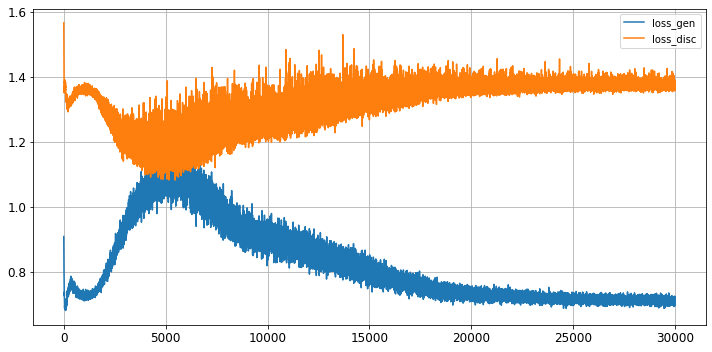

In [8]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+'.png')

### Sampleing from the latent space

Predicted Values: (1000, 3)
latent_space: 6
BATCH_SIZE: 100
epochs: 30000


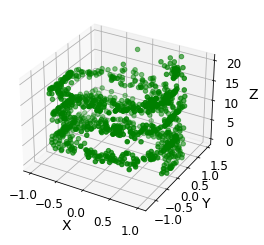

In [13]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = dcgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    #print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    

### Applying the prediction function

## Fixed Input

input_test : (900, 3)


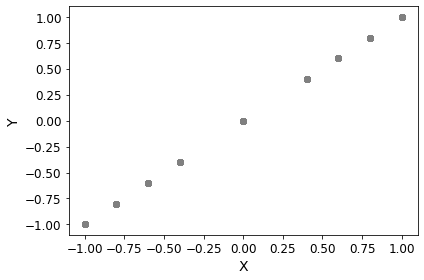

In [10]:
# define these for desired prediction
x_input = [-1,-0.8,-0.6,-0.4,0,0.4,0.6,0.8,1]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
#predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [11]:
X_generated = dcgan.predict(input_test, scaler)

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

latent_space= 6
Epochs= 30000
BATCH_SIZE= 100
X-Y 2D slices:


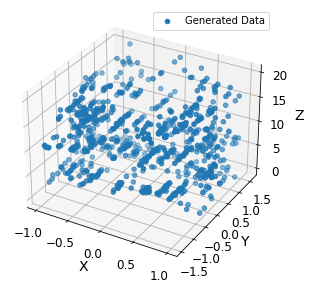

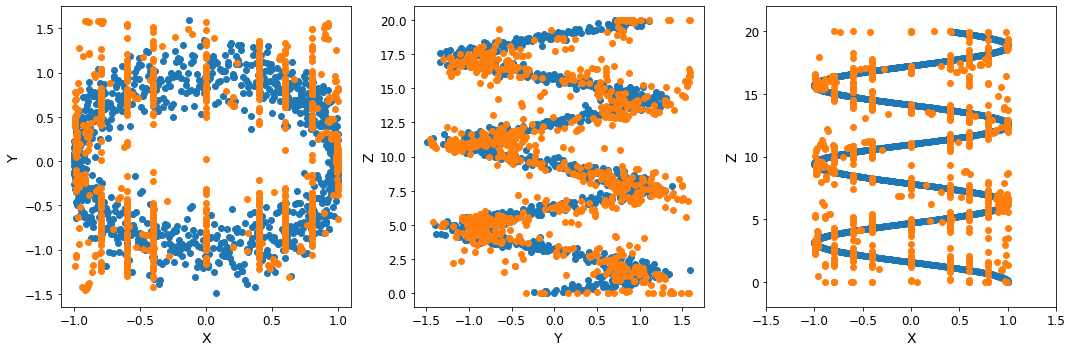

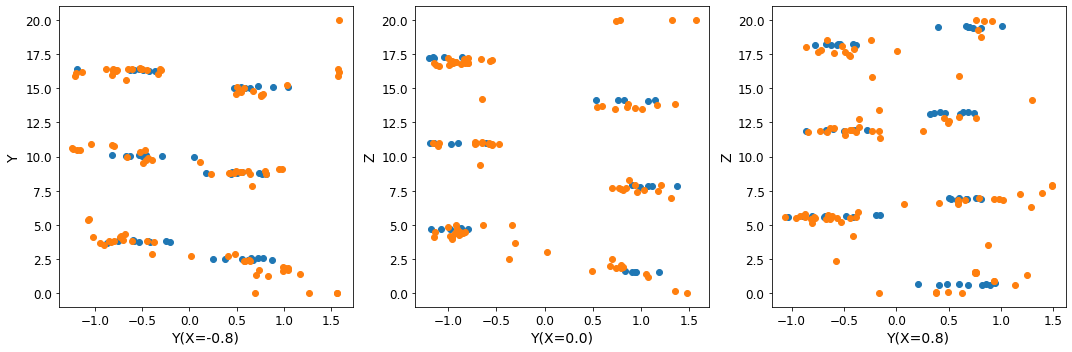

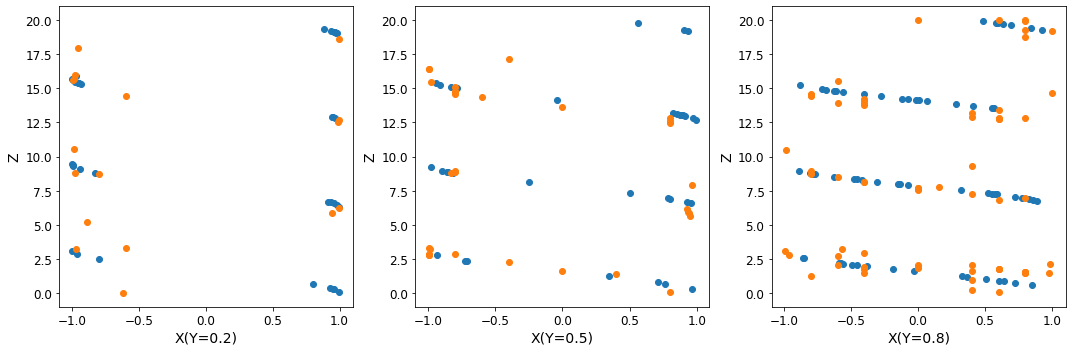

In [12]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    #print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()